# SISTEM PREDIKSI PENJUALAN 

### Dataset yang akan gunakan adalah:
* Dataset Walmart dari Kaggle: https://www.kaggle.com/datasets/yasserh/walmart-dataset
* dataset ini terdiri dari beberapa data, yaitu Store.csv, Feature.csv, train.csv, test.csv. dan tambahan.csv
* Walmart adalah perusahaan ritel terkenal yang mengoperasikan rantai hypermarket.
* Dataset ini merupakan gabungan data dari 45 toko termasuk informasi toko dan penjualan bulanan.
* Penjualan merupakan proses bisnis yang paling penting didalam perusahan ritel
* Dengan menggunakan dataset ini kita dapat melakukan prediksi penjualan toko dalam seminggu kedepan, dimana dengan hasil prediksi pihak manajemen diharapkan dapat menerapkan strategi yang tepat agar dapat meningkatkan penjualan di toko

## output/class dari sistem prediksi ini adalah Weekly Sales (penjualan per minggu)

In [ ]:
# import modul/package yang dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

ERROR: You must give at least one requirement to install (see "pip help install")

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'matplotlib'

## Berikut penjelasan singkat untuk setiap library dan fungsi yang diimpor:
1. numpy as np: Library untuk komputasi numerik, termasuk operasi array dan fungsi matematika. pandas as pd
2. Library: untuk manipulasi dan analisis data berbasis tabel (dataframe). matplotlib.pyplot as plt
3. Library untuk visualisasi data berupa grafik, seperti line chart atau bar chart. seaborn as sns
4. Library berbasis Matplotlib untuk membuat visualisasi statistik yang lebih estetik. math
5. Modul bawaan Python untuk operasi matematika seperti logaritma dan trigonometri.
6. datetime dan timedelta: Digunakan untuk memanipulasi tanggal dan waktu:
7. datetime: Representasi waktu.
8. timedelta: Selisih waktu.
9. warnings.filterwarnings("ignore"): Mengabaikan semua pesan peringatan (warning), fungsi atau kode yang akan expired.

In [ ]:
data_train=pd.read_csv('./datasetpenjualan/trainset.csv')
data_train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


* sholiday artinya Indikator apakah minggu tersebut bertepatan dengan hari libur besar (misalnya, Natal, Thanksgiving, atau libur nasional lainnya)
* read_csv() digunakan untuk membaca file CSV dan menyimpannya dalam variabel data_train.
* head() digunakan untuk melihat 5 baris pertama dari data tersebut, sehingga bisa memeriksa data secara cepat.

In [ ]:
data_toko=pd.read_csv('./datasetpenjualan/stores.csv')
data_toko.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
data_tambahan=pd.read_csv('./datasetpenjualan/features.csv')
data_tambahan.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## TAHAP 1 
### Tahap Analisa Data, Cek Missing Value, Oulier & Data Duplikat yang bertujuan untuk  mengenali,memahami, dan menggali data yg kita punya 

## 1. Dataset Toko (store)

In [ ]:
data_toko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


### Dataset toko (store) berisi informasi tentang 45 toko, dengan 3 kolom:
1. Store: ID toko (tipe data int64)
2. Type: Jenis toko (tipe data object)
3. Size: Ukuran toko (tipe data int64)

In [ ]:
data_toko.describe() 

#describe() memberikan ringkasan statistik dari data numerik, seperti rata-rata, minimum, maksimum, dan kuartil.


,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


## Statistik Dataset
1. Count: Jumlah data dalam setiap kolom.
2. Mean: Nilai rata-rata untuk setiap kolom.
3. Std (Standard Deviation): Ukuran statistik untuk menunjukkan variasi atau penyebaran nilai dalam satu kolom.
4. Min: Nilai minimum dalam setiap kolom atau variabel.
5. 25% (Q1 - Kuartil 1): Nilai batas bawah atau kuartil pertama.
6. 50% (Q2 - Median): Nilai tengah atau median dari data.
7. 75% (Q3 - Kuartil 3): Nilai batas atas atau kuartil ketiga.
8. Max: Nilai maksimum dalam setiap kolom atau variabel.

In [ ]:
data_toko['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

## Dataset Toko (Store)
* dataset ini terdiri dari 45 baris data
* dengan 3 kolom/atribut/feature, dengan masing kolom memiliki nilai sbb:
1. kolom Store dengan tipe data int (nilai min=1, nilai maks=45)
2. kolom type dengan tipe data object terdiri dari kategori A, B, dan C
3. kolom Size dengan tipe data int (nilai min=34875, nilai maks=219622)

## 2. Data Training (Trainset)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
data_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
print(data_train["Date"].nunique())
data_train["Date"].unique()

143


array(['2/5/2010', '2/12/2010', '2/19/2010', '2/26/2010', '3/5/2010',
       '3/12/2010', '3/19/2010', '3/26/2010', '4/2/2010', '4/9/2010',
       '4/16/2010', '4/23/2010', '4/30/2010', '5/7/2010', '5/14/2010',
       '5/21/2010', '5/28/2010', '6/4/2010', '6/11/2010', '6/18/2010',
       '6/25/2010', '7/2/2010', '7/9/2010', '7/16/2010', '7/23/2010',
       '7/30/2010', '8/6/2010', '8/13/2010', '8/20/2010', '8/27/2010',
       '9/3/2010', '9/10/2010', '9/17/2010', '9/24/2010', '10/1/2010',
       '10/8/2010', '10/15/2010', '10/22/2010', '10/29/2010', '11/5/2010',
       '11/12/2010', '11/19/2010', '11/26/2010', '12/3/2010',
       '12/10/2010', '12/17/2010', '12/24/2010', '12/31/2010', '1/7/2011',
       '1/14/2011', '1/21/2011', '1/28/2011', '2/4/2011', '2/11/2011',
       '2/18/2011', '2/25/2011', '3/4/2011', '3/11/2011', '3/18/2011',
       '3/25/2011', '4/1/2011', '4/8/2011', '4/15/2011', '4/22/2011',
       '4/29/2011', '5/6/2011', '5/13/2011', '5/20/2011', '5/27/2011',
       '6/3

## Dataset Trainset
* dataset ini terdiri dari 421570 baris data
* dengan 5 kolom/atribut/feature, dengan masing kolom memiliki nilai sbb:
1. kolom Store dengan tipe data int (nilai min=1, nilai maks=45)
2. kolom Dept dengan tipe data object terdiri dari kategori A, B, dan C
3. kolom WeeklySales dengan tipe data int (nilai min=34875, nilai maks=219622)
4. kolom Date dengan tipe data object( terdiri dari 143 kategori/data, mulai dari tanggal 2/5/2010 sampai tanggal 10/26/2012)
5. kolom IsHolyday dengan tipe data Boolean (True= 1 dan False=0)

## 3. Dataset tambahan(Features)

In [ ]:
data_tambahan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
data_tambahan.describe().round(0)

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.0,8190.0,8190.0,4032.0,2921.0,3613.0,3464.0,4050.0,7605.0,7605.0
mean,23.0,59.0,3.0,7032.0,3384.0,1760.0,3293.0,4132.0,172.0,8.0
std,13.0,19.0,0.0,9263.0,8794.0,11276.0,6792.0,13087.0,40.0,2.0
min,1.0,-7.0,2.0,-2781.0,-266.0,-179.0,0.0,-185.0,126.0,4.0
25%,12.0,46.0,3.0,1578.0,69.0,7.0,305.0,1441.0,132.0,7.0
50%,23.0,61.0,4.0,4744.0,365.0,36.0,1176.0,2727.0,183.0,8.0
75%,34.0,74.0,4.0,8923.0,2153.0,163.0,3310.0,4833.0,214.0,9.0
max,45.0,102.0,4.0,103185.0,104520.0,149483.0,67475.0,771448.0,229.0,14.0


### indikasi nilai mising value dan nilai outlier terdapat pada kolom markdwon1 sampai 5
### nilai yang outlier berdasarkan nilai max terdapat pada kolom temperature

#### std atau Standar deviasi adalah ukuran statistik yang menunjukkan seberapa besar variasi atau penyebaran suatu set data dibandingkan dengan rata-ratanya. Dalam konteks dataset, standar deviasi membantu untuk memahami seberapa jauh nilai-nilai dalam dataset tersebut menyimpang dari nilai rata-ratanya.
* poin penting mengenai standar deviasi:
* Interpretasi:
1. Standar deviasi rendah menunjukkan bahwa nilai-nilai dalam dataset cenderung dekat dengan rata-rata.
2. Standar deviasi tinggi menunjukkan bahwa nilai-nilai dalam dataset tersebar jauh dari rata-rata, yang berarti terdapat variasi yang besar dalam data.

In [ ]:
print(data_tambahan["Date"].nunique())#menampilkan jumlah data yang uniq atau berbeda didalam kolom atau variable
data_tambahan["Date"].unique()#fungsi untuk menampilkan data yang uniq didalam kolom 

182


array(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
       '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
       '2010-04-02', '2010-04-09', '2010-04-16', '2010-04-23',
       '2010-04-30', '2010-05-07', '2010-05-14', '2010-05-21',
       '2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
       '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
       '2010-07-23', '2010-07-30', '2010-08-06', '2010-08-13',
       '2010-08-20', '2010-08-27', '2010-09-03', '2010-09-10',
       '2010-09-17', '2010-09-24', '2010-10-01', '2010-10-08',
       '2010-10-15', '2010-10-22', '2010-10-29', '2010-11-05',
       '2010-11-12', '2010-11-19', '2010-11-26', '2010-12-03',
       '2010-12-10', '2010-12-17', '2010-12-24', '2010-12-31',
       '2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
       '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
       '2011-03-04', '2011-03-11', '2011-03-18', '2011-03-25',
       '2011-04-01', '2011-04-08', '2011-04-15', '2011-

## Dataset input/atribut/features
* Dataset ini terdiri dari 8190 baris data dengan 12 kolom/atribut sebagai berikut:
1. Store: ID toko (tipe int64), dengan nilai minimum 1 dan maksimum 45.
2. Date: Tanggal dalam format object, dengan rentang tanggal 2010-02-05 hingga 2013-07-26.
3. Temperature: Suhu dalam skala Fahrenheit (tipe float64), menunjukkan suhu lingkungan di lokasi toko.
4. Fuel_Price: Harga BBM di lokasi toko (tipe float64), dengan nilai minimum 2.472 dan maksimum 4.468.
5. MarkDown1 - MarkDown5: Diskon/promosi yang diberikan (tipe float64), beberapa memiliki nilai null.
6. CPI (Customer Price Index): Indeks harga konsumen (tipe float64), dengan nilai minimum 126.0 dan maksimum 229.0.
7. Unemployment: Tingkat pengangguran di lokasi toko (tipe float64), dengan nilai minimum 4.0 dan maksimum 14.0.
8. IsHoliday: Indikator hari libur (tipe Boolean), dengan True = 1 dan False = 0.

## Menghitung Data Unique dan Nunique

## 1. Store

In [ ]:
print(data_tambahan["Store"].nunique())#menampilkan jumlah data yang uniq atau berbeda didalam kolom atau variable
data_tambahan["Store"].unique()#fungsi untuk menampilkan data yang uniq didalam kolom 

45


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

### Kolom "Store" memiliki 45 toko unik.
### Toko-toko tersebut diberi ID numerik dari 1 hingga 45.
### Tidak ada toko yang memiliki ID yang sama lebih dari sekali dalam daftar nilai unik ini.

## 2. Temperatur

In [ ]:
# Menampilkan jumlah nilai unik dalam kolom "Temperature"
print(data_tambahan["Temperature"].nunique())

# Menampilkan daftar nilai unik dalam kolom "Temperature"
data_tambahan["Temperature"].unique()


4178


array([42.31, 38.51, 39.93, ..., 81.7 , 77.59, 79.13])

### Kolom "Temperature" memiliki 4.178 nilai unik.
### Nilai-nilai ini mencerminkan variasi suhu dalam dataset.
### Contoh nilai unik yang terdapat dalam kolom ini adalah 42.31, 38.51, 39.93, hingga 81.7, 77.59, dan 79.13.

In [ ]:
# Menampilkan data di mana suhu lebih dari 48°C
data_tambahan[data_tambahan["Temperature"] > 48]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


## Indikasi outlier pada kolom Temperature terdapat 5.885 baris data dengan suhu lebih dari 48°C.

## 3. MarkDown1

In [ ]:
# Menampilkan jumlah nilai unik dalam kolom "MarkDown1"
print(data_tambahan["MarkDown1"].nunique())

# Menampilkan daftar nilai unik dalam kolom "MarkDown1"
data_tambahan["MarkDown1"].unique()

4023


array([     nan, 10382.9 ,  6074.12, ...,  3789.94,  2961.49,   212.02])

## Kolom MarkDown1 memiliki 4023 nilai yang unik,
## Nilai-nilai ini mencerminkan variasi diskon atau markdown yang diterapkan dalam dataset.
## Contoh nilai yang terdapat dalam kolom ini adalah NaN, 10382.9, 6074.12, 3789.94, 2961.49, hingga 212.02.
* NaN menunjukkan adanya data yang kosong atau tidak tersedia pada beberapa baris.
* Nilai-nilai numerik tersebut adalah besaran diskon yang bervariasi, yang kemungkinan besar dihitung dalam mata uang atau unit tertentu.

In [ ]:
# Menampilkan data di mana nilai "MarkDown1" kurang dari 0
data_tambahan[data_tambahan["MarkDown1"] < 0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
4162,23,2013-02-15,25.39,3.807,-563.90,2825.54,21.0,5510.21,4677.39,138.900429,3.932,False
5437,30,2013-02-22,49.09,3.597,-2781.45,297.30,NaN,NaN,791.67,224.054703,6.237,False
6514,36,2012-11-09,68.58,3.313,-16.93,850.05,NaN,NaN,733.24,222.150626,6.228,False
6518,36,2012-12-07,68.04,3.204,-772.21,NaN,NaN,NaN,692.10,222.325549,6.228,False


* Data Outlier ada 4 baris data pada kolom MarkDown1

### terdapat 4 baris data pada kolom MarkDown1 yang memiliki nilai negatif.
### Ini menunjukkan adanya outlier atau kesalahan dalam data markdown yang seharusnya tidak bernilai negatif. Dalam konteks diskon atau markdown, nilai negatif biasanya tidak sesuai dengan logika bisnis, kecuali ada penjelasan tertentu.

## 4. MarkDown2

In [ ]:
# Menampilkan jumlah nilai unik dalam kolom "MarkDown2"
print(data_tambahan["MarkDown2"].nunique())

# Menampilkan daftar nilai unik dalam kolom "MarkDown2"
data_tambahan["MarkDown2"].unique()

2715


array([    nan, 6115.67,  254.39, ..., 1827.31, 1047.07,  851.73])

## Kolom MarkDown2 memiliki 2715 nilai unik.
## Nilai unik dalam kolom ini adalah 6115.67, 254.39, 1827.31, 1047.07, dan 851.73.

In [ ]:
data_tambahan[data_tambahan["MarkDown2"] < 0 ] 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
657,4,2012-03-23,59.07,3.759,8806.80,-10.50,5.99,739.14,4396.97,130.896645,4.607,False
860,5,2012-08-17,87.52,3.571,1649.56,-10.98,2.31,1955.75,1205.23,222.627675,5.603,False
873,5,2012-11-16,56.89,3.252,1631.01,-35.74,15.46,326.59,2310.83,224.106624,5.422,False
1265,7,2013-05-31,50.70,3.870,2350.78,-7.76,91.59,166.86,540.89,NaN,NaN,False
1587,9,2012-08-10,88.66,3.494,3180.78,-9.94,1.40,2112.03,2314.58,225.717009,5.277,False
1591,9,2012-09-07,87.93,3.730,4837.99,-5.96,22.74,602.80,1377.59,226.210354,5.277,True
1748,10,2012-03-16,62.11,4.273,3977.45,-10.50,6.03,1928.50,2273.92,130.826193,7.545,False
1766,10,2012-07-20,84.45,3.589,6596.80,-1.60,44.60,4275.27,10650.28,130.701290,7.170,False
1987,11,2013-04-19,70.87,3.451,3808.66,-15.45,142.70,529.99,2742.75,228.729864,5.999,False
2128,12,2012-07-06,89.13,3.765,10804.73,-0.60,3.33,5397.84,4395.03,130.719633,10.926,False


### data outlier ada 25 baris pada kolom MarkDown2

## 5. MarkDown3

In [ ]:
# Menampilkan jumlah nilai unik dalam kolom "MarkDown3"
print(data_tambahan["MarkDown3"].nunique())

# Menampilkan daftar nilai unik dalam kolom "MarkDown3"
data_tambahan["MarkDown3"].unique()

2885


array([   nan, 215.07,  51.98, ...,  85.72, 204.19,   2.06])

### Kolom MarkDown3 memiliki 2885 nilai unik
### Contoh nilai unik dalam kolom ini adalah 215.07, 51.98, 85.72, 204.19, dan 2.06

In [ ]:
data_tambahan[data_tambahan["MarkDown3"] < 0 ] 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1063,6,2013-01-11,48.26,3.243,5510.29,33063.57,-0.86,693.10,3418.77,225.832011,5.372,False
1611,9,2013-01-25,49.14,3.227,200.46,348.20,-14.29,59.00,2162.77,228.030618,5.049,False
1615,9,2013-02-22,45.91,3.597,2810.86,1405.04,-179.26,63.12,3593.56,228.205445,5.049,False
2337,13,2013-01-11,20.00,2.982,3726.82,17212.29,-23.97,116.72,2662.80,131.957000,5.372,False
3978,22,2013-02-01,32.63,3.608,19102.16,1403.25,-89.10,43742.76,1549.09,142.868066,7.328,False
3981,22,2013-02-22,30.28,3.866,10313.25,4247.11,-2.58,2512.93,3651.16,142.970823,7.328,False
5036,28,2012-06-08,84.83,4.103,9026.85,101.20,-29.10,833.67,11752.37,130.889677,11.627,False
5572,31,2012-03-30,67.87,3.845,9546.49,584.62,-1.00,1334.23,3691.10,220.999125,7.057,False
6354,35,2013-04-12,53.28,3.724,4828.15,4850.29,-44.54,878.64,1098.99,143.220074,8.360,False
6466,36,2011-12-09,50.64,3.147,NaN,NaN,-0.87,NaN,1129.02,217.664588,7.716,False


### Data Outlier ada 13 baris pada kolom MarkDown3

# 6. MarkDown4

In [23]:
# Menampilkan jumlah nilai unik dalam kolom "MarkDown4"
print(data_tambahan["MarkDown4"].nunique())

# Menampilkan daftar nilai unik dalam kolom "MarkDown4"
data_tambahan["MarkDown4"].unique()

3405


array([    nan, 2406.62,  427.39, ...,  744.84,  363.  ,   10.88])

### Kolom MarkDown4 memiliki 3405 nilai unik  
### Contoh nilai unik dalam kolom ini adalah 2406.62, 427.39, 744.84, 363.00, dan 10.88

In [24]:
data_tambahan[data_tambahan["MarkDown4"] < 0 ] 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday


### Pada kolom MarkDown 4 tidak terdapat data Outlier

## 7. MarkDown5

In [25]:
# Menampilkan jumlah nilai unik dalam kolom "MarkDown5"
print(data_tambahan["MarkDown5"].nunique())

# Menampilkan daftar nilai unik dalam kolom "MarkDown5"
data_tambahan["MarkDown5"].unique()

4045


array([    nan, 6551.42, 5988.57, ..., 2150.36, 1059.46, 1864.57])

### Kolom MarkDown5 memiliki 4045 nilai unik  
### Contoh nilai unik dalam kolom ini adalah 6551.42, 5988.57, 2150.36, 1059.46, dan 1864.57.

In [26]:
data_tambahan[data_tambahan["MarkDown5"] < 0 ] 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
893,5,2013-04-05,61.88,3.583,9023.29,927.32,170.24,405.30,-185.17,225.682320,5.278,False
5785,32,2012-11-02,46.32,3.604,11156.55,5943.82,24.22,441.71,-37.02,199.290867,7.557,False


### Data Outlie ada 2 baris Pada kolom MarkDown5

## 8. CPI

### CPI (Consumer Price Index) atau Indeks Harga Konsumen (IHK) adalah ukuran yang mencerminkan perubahan rata-rata harga barang dan jasa dari waktu ke waktu.
### CPI mengukur tingkat inflasi yang dapat mempengaruhi daya beli konsumen, yang pada akhirnya dapat berdampak pada jumlah penjualan per minggu.

In [27]:
# Jumlah nilai unik dalam kolom CPI
print(data_tambahan["CPI"].nunique())

# Daftar nilai unik dalam kolom CPI
print(data_tambahan["CPI"].unique()) 

2505
[211.0963582 211.2421698 211.2891429 ... 216.2828641 216.3629608
 216.4430576]


### Kolom CPI memiliki 2505 nilai unik  
### Contoh nilai unik dalam kolom ini adalah 211.10, 211.24, 211.29, 216.28, dan 216.36

## Mencari Outlier pada Kolom CPI

In [28]:
# Menampilkan nilai minimum dalam kolom CPI
data_tambahan["CPI"].min()

126.064

### Nilai Minimum dalam kolom CPI adalah 126.064

In [29]:
# Menampilkan nilai maksimum dalam kolom CPI
data_tambahan["CPI"].max()

228.9764563

### Nilai Maksimum dalam kolom CPI adalah 228.97

In [30]:
print("Jumlah data outlier CPI:", data_tambahan[(data_tambahan["CPI"] < 126.064) | (data_tambahan["CPI"] > 228.9764563)].shape[0])

Jumlah data outlier CPI: 0


### Tidak ada data outlier pada kolom cpi

## 9. Unemployment

In [31]:
# Menampilkan jumlah nilai unik dalam kolom Unemployment
print(data_tambahan["Unemployment"].nunique())

# Menampilkan daftar nilai unik dalam kolom Unemployment
data_tambahan["Unemployment"].unique()
 

404


array([ 8.106,  7.808,  7.787,  7.838,  7.742,  7.682,  7.962,  7.866,
        7.348,  7.143,  6.908,  6.573,  6.525,  6.314,    nan,  8.324,
        8.2  ,  8.099,  8.163,  8.028,  7.931,  7.852,  7.441,  7.057,
        6.891,  6.565,  6.17 ,  6.237,  6.112,  7.368,  7.343,  7.346,
        7.564,  7.551,  7.574,  7.567,  7.197,  6.833,  6.664,  6.334,
        6.034,  6.108,  5.999,  8.623,  7.896,  7.372,  7.127,  6.51 ,
        5.946,  5.644,  5.143,  4.607,  4.308,  4.077,  3.879,  3.921,
        3.896,  6.566,  6.465,  6.496,  6.768,  6.634,  6.489,  6.529,
        6.3  ,  5.943,  5.801,  5.603,  5.422,  5.494,  5.278,  7.259,
        7.092,  6.973,  7.007,  6.858,  6.855,  6.925,  6.551,  6.132,
        5.964,  5.668,  5.329,  5.372,  5.285,  9.014,  8.963,  9.017,
        9.137,  8.818,  8.595,  8.622,  8.513,  8.256,  8.09 ,  7.872,
        7.557,  7.107,  6.953,  6.299,  6.29 ,  6.315,  6.433,  6.262,
        6.297,  6.425,  6.123,  5.825,  5.679,  5.401,  5.124,  5.212,
      

### Kolom CPI memiliki 404 nilai unik

## Mencari Nilai Outlier Unemployment

In [32]:
# Cek nilai minimum dan maksimum
min_value = data_tambahan["Unemployment"].min()
max_value = data_tambahan["Unemployment"].max()

In [33]:
print("Nilai Minimum Unemployment:", min_value)
print("Nilai Maksimum Unemployment:", max_value)


Nilai Minimum Unemployment: 3.684
Nilai Maksimum Unemployment: 14.313


In [34]:
# Menentukan apakah ada outlier (diluar rentang 0-100)
if min_value < 0 or max_value > 100:
    print("Terdapat outlier pada Unemployment!")
else:
    print("Tidak ada outlier pada Unemployment.")


Tidak ada outlier pada Unemployment.


### Tidak ada data outlier pada kolom Unemployment

## Penggabungan ketiga dataframe

In [35]:
# Inner Joint
df=data_train.merge(data_tambahan, on=["Store", "Date"],
 how = "inner").merge(data_toko, on=["Store"], how="inner")
df

,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Store,Type,Size


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dept          0 non-null      int64  
 1   Date          0 non-null      object 
 2   Weekly_Sales  0 non-null      float64
 3   IsHoliday_x   0 non-null      bool   
 4   Temperature   0 non-null      float64
 5   Fuel_Price    0 non-null      float64
 6   MarkDown1     0 non-null      float64
 7   MarkDown2     0 non-null      float64
 8   MarkDown3     0 non-null      float64
 9   MarkDown4     0 non-null      float64
 10  MarkDown5     0 non-null      float64
 11  CPI           0 non-null      float64
 12  Unemployment  0 non-null      float64
 13  IsHoliday_y   0 non-null      bool   
 14  Store         0 non-null      int64  
 15  Type          0 non-null      object 
 16  Size          0 non-null      int64  
dtypes: bool(2), float64(10), int64(3), object(2)
memory usage: 0.0+ bytes


### terdapat kesalahan saat menggabungkan dataframe

In [37]:
df1=data_train.merge(data_tambahan, on=["Store", "Date"], how = "left")
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2/5/2010,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2/12/2010,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2/19/2010,41595.55,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,2/26/2010,19403.54,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,3/5/2010,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,9/28/2012,508.37,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421566,45,98,10/5/2012,628.10,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421567,45,98,10/12/2012,1061.02,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421568,45,98,10/19/2012,760.01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data di atas merupakan hasil penggabungan antara data_train dan data_tambahan berdasarkan Store dan Date dengan metode left join.
### Jumlah baris: 421570

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   0 non-null       float64
 6   Fuel_Price    0 non-null       float64
 7   MarkDown1     0 non-null       float64
 8   MarkDown2     0 non-null       float64
 9   MarkDown3     0 non-null       float64
 10  MarkDown4     0 non-null       float64
 11  MarkDown5     0 non-null       float64
 12  CPI           0 non-null       float64
 13  Unemployment  0 non-null       float64
 14  IsHoliday_y   0 non-null       object 
dtypes: bool(1), float64(10), int64(2), object(2)
memory usage: 48.6+ MB


**1. Store** (Toko)  
   Memiliki **421.570** baris data dengan tipe data **int64** (numerik).  
   Menunjukkan kode unik untuk setiap toko.  

**2. Dept** (Departemen)  
   Memiliki **421.570** baris data dengan tipe data **int64** (numerik).  
   Menunjukkan kode unik untuk setiap departemen dalam toko.  

**3. Date** (Tanggal)  
   Memiliki **421.570** baris data dengan tipe data **object** (string).  
   Menunjukkan tanggal transaksi dalam format YYYY-MM-DD.  

**4. Weekly_Sales** (Penjualan Mingguan)  
   Memiliki **421.570** baris data dengan tipe data **float64** (numerik).  
   Menunjukkan total penjualan dalam satu minggu untuk suatu toko dan departemen.  

**5. IsHoliday_x** (Hari Libur - Data Utama)  
   Memiliki **421.570** baris data dengan tipe data **bool** (biner: True/False).  
   Menunjukkan apakah minggu tersebut merupakan minggu dengan hari libur besar.  

**6. Temperature** (Suhu)  
   Memiliki **421.570** baris data dengan tipe data **float64** (numerik).  
   Menunjukkan suhu rata-rata dalam Fahrenheit.  

**7. Fuel_Price** (Harga Bahan Bakar)  
   Memiliki **421.570** baris data dengan tipe data **float64** (numerik).  
   Menunjukkan harga rata-rata bahan bakar dalam USD per galon.  

**8. MarkDown1** (Diskon 1)  
   Memiliki **150.681** baris data dengan tipe data **float64** (numerik).  
   Menunjukkan nilai diskon pertama yang diberikan sebelum hari libur besar.  

**9. MarkDown2** (Diskon 2)  
   Memiliki **111.248** baris data dengan tipe data **float64** (numerik).  
   Menunjukkan nilai diskon kedua yang diberikan sebelum hari libur besar.  

**10. MarkDown3** (Diskon 3)  
    Memiliki **137.091** baris data dengan tipe data **float64** (numerik).  
    Menunjukkan nilai diskon ketiga yang diberikan sebelum hari libur besar.  

**11. MarkDown4** (Diskon 4)  
    Memiliki **134.967** baris data dengan tipe data **float64** (numerik).  
    Menunjukkan nilai diskon keempat yang diberikan sebelum hari libur besar.  

**12. MarkDown5** (Diskon 5)  
    Memiliki **151.432** baris data dengan tipe data **float64** (numerik).  
    Menunjukkan nilai diskon kelima yang diberikan sebelum hari libur besar.  

**13. CPI** (Consumer Price Index)  
    Memiliki **421.570** baris data dengan tipe data **float64** (numerik).  
    Menunjukkan indeks harga konsumen sebagai indikator inflasi.  

**14. Unemployment** (Tingkat Pengangguran)  
    Memiliki **421.570** baris data dengan tipe data **float64** (numerik).  
    Menunjukkan tingkat pengangguran dalam persentase.  

**15. IsHoliday_y** (Hari Libur - Data Tambahan)  
    Memiliki **421.570** baris data dengan tipe data **bool** (biner: True/False).  
    Menunjukkan apakah minggu tersebut merupakan minggu dengan hari libur besar berdasarkan data tambahan.  



In [39]:
df2=data_train.merge(data_toko, on=["Store"], how="left")
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2/5/2010,24924.50,False,A,151315
1,1,1,2/12/2010,46039.49,True,A,151315
2,1,1,2/19/2010,41595.55,False,A,151315
3,1,1,2/26/2010,19403.54,False,A,151315
4,1,1,3/5/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,9/28/2012,508.37,False,B,118221
421566,45,98,10/5/2012,628.10,False,B,118221
421567,45,98,10/12/2012,1061.02,False,B,118221
421568,45,98,10/19/2012,760.01,False,B,118221


In [40]:
print(data_train["Date"].unique())
data_tambahan["Date"].unique()

['2/5/2010' '2/12/2010' '2/19/2010' '2/26/2010' '3/5/2010' '3/12/2010'
 '3/19/2010' '3/26/2010' '4/2/2010' '4/9/2010' '4/16/2010' '4/23/2010'
 '4/30/2010' '5/7/2010' '5/14/2010' '5/21/2010' '5/28/2010' '6/4/2010'
 '6/11/2010' '6/18/2010' '6/25/2010' '7/2/2010' '7/9/2010' '7/16/2010'
 '7/23/2010' '7/30/2010' '8/6/2010' '8/13/2010' '8/20/2010' '8/27/2010'
 '9/3/2010' '9/10/2010' '9/17/2010' '9/24/2010' '10/1/2010' '10/8/2010'
 '10/15/2010' '10/22/2010' '10/29/2010' '11/5/2010' '11/12/2010'
 '11/19/2010' '11/26/2010' '12/3/2010' '12/10/2010' '12/17/2010'
 '12/24/2010' '12/31/2010' '1/7/2011' '1/14/2011' '1/21/2011' '1/28/2011'
 '2/4/2011' '2/11/2011' '2/18/2011' '2/25/2011' '3/4/2011' '3/11/2011'
 '3/18/2011' '3/25/2011' '4/1/2011' '4/8/2011' '4/15/2011' '4/22/2011'
 '4/29/2011' '5/6/2011' '5/13/2011' '5/20/2011' '5/27/2011' '6/3/2011'
 '6/10/2011' '6/17/2011' '6/24/2011' '7/1/2011' '7/8/2011' '7/15/2011'
 '7/22/2011' '7/29/2011' '8/5/2011' '8/12/2011' '8/19/2011' '8/26/2011'
 '9/2/2011' 

array(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
       '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
       '2010-04-02', '2010-04-09', '2010-04-16', '2010-04-23',
       '2010-04-30', '2010-05-07', '2010-05-14', '2010-05-21',
       '2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
       '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
       '2010-07-23', '2010-07-30', '2010-08-06', '2010-08-13',
       '2010-08-20', '2010-08-27', '2010-09-03', '2010-09-10',
       '2010-09-17', '2010-09-24', '2010-10-01', '2010-10-08',
       '2010-10-15', '2010-10-22', '2010-10-29', '2010-11-05',
       '2010-11-12', '2010-11-19', '2010-11-26', '2010-12-03',
       '2010-12-10', '2010-12-17', '2010-12-24', '2010-12-31',
       '2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
       '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
       '2011-03-04', '2011-03-11', '2011-03-18', '2011-03-25',
       '2011-04-01', '2011-04-08', '2011-04-15', '2011-

In [41]:
data_train["Date"]=pd.to_datetime(data_train["Date"])
data_tambahan["Date"]=pd.to_datetime(data_tambahan["Date"])
print(data_train["Date"].unique())
data_tambahan["Date"].unique()

['2010-02-05T00:00:00.000000000' '2010-02-12T00:00:00.000000000'
 '2010-02-19T00:00:00.000000000' '2010-02-26T00:00:00.000000000'
 '2010-03-05T00:00:00.000000000' '2010-03-12T00:00:00.000000000'
 '2010-03-19T00:00:00.000000000' '2010-03-26T00:00:00.000000000'
 '2010-04-02T00:00:00.000000000' '2010-04-09T00:00:00.000000000'
 '2010-04-16T00:00:00.000000000' '2010-04-23T00:00:00.000000000'
 '2010-04-30T00:00:00.000000000' '2010-05-07T00:00:00.000000000'
 '2010-05-14T00:00:00.000000000' '2010-05-21T00:00:00.000000000'
 '2010-05-28T00:00:00.000000000' '2010-06-04T00:00:00.000000000'
 '2010-06-11T00:00:00.000000000' '2010-06-18T00:00:00.000000000'
 '2010-06-25T00:00:00.000000000' '2010-07-02T00:00:00.000000000'
 '2010-07-09T00:00:00.000000000' '2010-07-16T00:00:00.000000000'
 '2010-07-23T00:00:00.000000000' '2010-07-30T00:00:00.000000000'
 '2010-08-06T00:00:00.000000000' '2010-08-13T00:00:00.000000000'
 '2010-08-20T00:00:00.000000000' '2010-08-27T00:00:00.000000000'
 '2010-09-03T00:00:00.000

array(['2010-02-05T00:00:00.000000000', '2010-02-12T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', '2010-02-26T00:00:00.000000000',
       '2010-03-05T00:00:00.000000000', '2010-03-12T00:00:00.000000000',
       '2010-03-19T00:00:00.000000000', '2010-03-26T00:00:00.000000000',
       '2010-04-02T00:00:00.000000000', '2010-04-09T00:00:00.000000000',
       '2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-05-07T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-06-04T00:00:00.000000000',
       '2010-06-11T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-07-02T00:00:00.000000000',
       '2010-07-09T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-08-06T00:00:00.000000000', '2010-08-13

In [42]:
df=data_train.merge(data_tambahan, on=["Store", "Date"],
 how = "inner").merge(data_toko, on=["Store"], how="inner")
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


In [43]:
df.drop(['IsHoliday_y'],axis=1,inplace=True)
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


# Cek Data Duplikat

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [45]:
df.duplicated().sum()

0

# Cek Missing Value

In [46]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

### Pada MarkDown1-MarkDown5 terdapat Missing Value
1. MarkDown1: 270,889 data hilang
2. MarkDown2: 310,322 data hilang
3. MarkDown3: 284,479 data hilang
4. MarkDown4: 286,603 data hilang
5. MarkDown5: 270,138 data hilang

In [47]:
df=df.fillna(0)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


### Setelah menerapkan df.fillna(0), jumlah data menjadi 421.570 baris, yang menunjukkan bahwa tidak ada data yang dihapus dalam proses ini. Semua nilai yang sebelumnya hilang atau kosong dalam kolom mana pun sekarang telah diisi dengan 0.Terutama berpengaruh pada kolom MarkDown1 hingga MarkDown5, yang mungkin sebelumnya memiliki banyak nilai kosong.

# Cek Outlier

In [48]:
import pandas as pd

pd.concat([df.head(10), df.tail(10)])

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315


### Hasil gabungan menampilkan **10 baris pertama** dan **10 baris terakhir** dari dataset, yang berisi informasi tentang **penjualan mingguan**, **suhu**, **harga bahan bakar**, **diskon**, dan faktor ekonomi (seperti CPI dan pengangguran) untuk dua toko yang berbeda, **Store 1** dan **Store 45**, dalam rentang waktu **2010 hingga 2012**.

In [49]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [50]:
df.loc[df['Weekly_Sales']<=0]


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,0.00,0.00,0.00,0.00,0.00,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,0.00,0.00,0.00,0.00,0.00,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,0.00,0.00,0.00,0.00,0.00,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,0.00,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


### Terdapat Data yang tidak lazim/logis pada kolom penjualan mingguan sebanyak 1358 baris data, karena tidak mungkin dalam 2 minggu sebuah toko tidak ada penjualan sama sekali, atau bahkan minus data yang outlier tersebut tidak akan kita gunakan

In [51]:
df=df.loc[df['Weekly_Sales']>0]
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


### Sebanyak 420212 baris data telah disaring dengan menghapus data dengan Weekly_Sales ≤ 0. Data ini kini hanya mencakup transaksi dengan penjualan positif, sehingga lebih relevan untuk analisis performa penjualan.

In [52]:
df.loc[df['MarkDown2']<0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
37488,4,1,2012-03-23,37148.64,False,59.07,3.759,8806.80,-10.5,5.99,739.14,4396.97,130.896645,4.607,A,205863
37489,4,2,2012-03-23,94894.85,False,59.07,3.759,8806.80,-10.5,5.99,739.14,4396.97,130.896645,4.607,A,205863
37490,4,3,2012-03-23,11416.47,False,59.07,3.759,8806.80,-10.5,5.99,739.14,4396.97,130.896645,4.607,A,205863
37491,4,4,2012-03-23,53921.90,False,59.07,3.759,8806.80,-10.5,5.99,739.14,4396.97,130.896645,4.607,A,205863
37492,4,5,2012-03-23,43779.18,False,59.07,3.759,8806.80,-10.5,5.99,739.14,4396.97,130.896645,4.607,A,205863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390412,41,95,2012-08-24,106329.16,False,69.07,3.558,6068.27,-20.0,85.74,3710.05,2287.85,198.098420,6.432,A,196321
390413,41,96,2012-08-24,3309.73,False,69.07,3.558,6068.27,-20.0,85.74,3710.05,2287.85,198.098420,6.432,A,196321
390414,41,97,2012-08-24,23337.75,False,69.07,3.558,6068.27,-20.0,85.74,3710.05,2287.85,198.098420,6.432,A,196321
390415,41,98,2012-08-24,9822.45,False,69.07,3.558,6068.27,-20.0,85.74,3710.05,2287.85,198.098420,6.432,A,196321


### Terdapat 1302 baris data dengan nilai MarkDown2 kurang dari 0, yang menunjukkan adanya pengurangan harga yang tidak lazim. Data ini bisa dianggap sebagai outlier dan mungkin perlu ditangani atau dikecualikan dalam analisis lebih lanjut.

In [53]:
df=df.loc[df['MarkDown2']>=0]
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


### Sebanyak 418.910 baris data telah disaring dengan menghapus data dengan MarkDown2 < 0. Data ini kini hanya mencakup nilai MarkDown2 yang nol atau positif

In [54]:
df.loc[df['MarkDown3']<0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
275613,28,1,2012-06-08,16711.36,False,84.83,4.103,9026.85,101.2,-29.1,833.67,11752.37,130.889677,11.627,A,206302
275614,28,2,2012-06-08,60649.41,False,84.83,4.103,9026.85,101.2,-29.1,833.67,11752.37,130.889677,11.627,A,206302
275615,28,3,2012-06-08,7754.15,False,84.83,4.103,9026.85,101.2,-29.1,833.67,11752.37,130.889677,11.627,A,206302
275616,28,4,2012-06-08,30868.99,False,84.83,4.103,9026.85,101.2,-29.1,833.67,11752.37,130.889677,11.627,A,206302
275617,28,5,2012-06-08,24278.55,False,84.83,4.103,9026.85,101.2,-29.1,833.67,11752.37,130.889677,11.627,A,206302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369160,39,94,2012-04-27,60054.15,False,69.11,3.814,5821.79,0.0,-0.2,164.58,8663.37,220.301448,6.989,A,184109
369161,39,95,2012-04-27,109647.52,False,69.11,3.814,5821.79,0.0,-0.2,164.58,8663.37,220.301448,6.989,A,184109
369162,39,96,2012-04-27,26633.01,False,69.11,3.814,5821.79,0.0,-0.2,164.58,8663.37,220.301448,6.989,A,184109
369163,39,97,2012-04-27,24556.59,False,69.11,3.814,5821.79,0.0,-0.2,164.58,8663.37,220.301448,6.989,A,184109


### Sebanyak 256 baris data memiliki nilai **MarkDown3** yang negatif. Data ini menunjukkan bahwa terdapat penurunan harga yang lebih besar dari nilai yang diharapkan pada kolom **MarkDown3** untuk beberapa toko dan departemen pada tanggal tertentu.

In [55]:
df=df.loc[df['MarkDown3']>=0]
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


### Sebanyak 418654 baris data telah dipertahankan setelah menyaring data dengan MarkDown3 ≥ 0. Artinya, 256 baris data yang memiliki nilai negatif pada kolom MarkDown3 telah dihapus

In [56]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000
mean,22.197354,44.242241,16028.664965,60.052348,3.359308,2575.945153,882.156489,470.476283,1080.156246,1654.468456,171.202468,7.961483,136684.968430
std,12.790526,30.510172,22726.308043,18.454874,0.458387,6056.919377,5086.078731,5544.292474,3901.826427,4207.467593,39.158998,1.864320,61010.768249
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2118.287500,46.660000,2.931000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7659.405000,62.060000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20267.445000,74.250000,3.735000,2753.900000,2.630000,4.360000,415.360000,2146.940000,212.412888,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [57]:
#menampilkan data ukuran dan tipe toko
df.groupby('Type').describe()['Size'].round(2)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,214066.0,182196.34,41547.97,39690.0,158114.0,202505.0,203819.0,219622.0
B,162124.0,101776.07,30944.91,34875.0,93188.0,114533.0,123737.0,140167.0
C,42464.0,40536.10,1194.69,39690.0,39690.0,39910.0,41062.0,42988.0


### Tipe A memiliki ukuran rata-rata yang terbesar, yaitu 182,196, dengan nilai minimum 39,690 dan maksimum 219,622. Ukuran toko pada Tipe A juga cukup bervariasi, dengan standar deviasi 41,548.

### Tipe B memiliki ukuran toko yang lebih kecil dengan rata-rata 101,776. Nilai terkecil pada Tipe B adalah 34,875, dan nilai terbesar adalah 140,167, dengan standar deviasi 30,945.

### Tipe C memiliki ukuran toko yang paling kecil, dengan rata-rata 40,536. Semua toko pada Tipe C memiliki ukuran yang sangat seragam, dengan nilai minimum dan 25% pada ukuran 39,690 dan standar deviasi yang sangat kecil (1,195).


In [58]:
df.groupby('Type')['Size'].value_counts()

Type  Size  
A     203819    20183
      219622    10457
      151315    10226
      202307    10214
      204184    10196
      205863    10196
      202505    10189
      203007    10170
      158114    10135
      203742    10102
      207499    10033
      206302    10027
      155083    10003
      203750     9961
      200898     9935
      196321     9912
      155078     9883
      152513     9844
      184109     9771
      39690      6478
      39910      6151
B     126512    10119
      114533    10018
      93188      9812
      120653     9805
      128107     9768
      70713      9738
      123737     9716
      119557     9646
      118221     9610
      112238     9597
      140167     9544
      93638      9424
      57197      9336
      103681     9335
      37392      9026
      34875      8919
      125833     8711
C     39910     14340
      39690     14258
      42988      7139
      41062      6727
Name: Size, dtype: int64

### Terdapat nilai outlier, dimana ukuran tipe toko A,B dan C, jika di klasifikasikan berdasarkan ukuran, maka:
1. nilai terbesar dari tipe toko C akan estafet dengan nilai awal atau terkecil dengan tipe toko B, begitu juga dengan nilai tipe toko A akan estafet dengan toko B
2. terdapat nilai pada tipe toko A yang berukuran 39690 sebanyak 6478 data dan dengan ukuran 39910 sebanyak 6151 data
3. terdapat nilai pada tipe toko B yang berukuran 37392 sebanyak 9026 data dan dengan ukuran 34875 sebanyak 8919 data


In [59]:
df.loc[df['Size'] <= 39910, 'Type'] = 'C'

In [60]:
#impor modul
from sklearn.model_selection import train_test_split
# Memecah data menjadi 20% untuk evaluasi dan 70% untuk training dan testing
data_uji, clean_data= train_test_split(df, test_size=0.70, random_state=42)
# Menampilkan ukuran masing-masing subset
print(f'Ukuran Data Evaluasi: {data_uji.shape}')
print(f'Ukuran Data Training: {clean_data.shape}')

Ukuran Data Evaluasi: (125596, 16)
Ukuran Data Training: (293058, 16)


In [61]:
# menyimpan data
data_uji.to_csv('.\datasetpenjualan\data_uji.csv',index=False)
clean_data.to_csv('.\datasetpenjualan\clean_data.csv',index=False)


In [62]:
data_df=pd.read_csv('./datasetpenjualan/clean_data.csv')
data_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,14,94,2010-04-02,79677.10,False,47.74,2.850,0.00,0.00,0.00,0.00,0.00,181.865754,8.899,A,200898
1,37,11,2010-06-11,1492.49,False,82.30,2.668,0.00,0.00,0.00,0.00,0.00,210.213567,8.464,C,39910
2,38,44,2011-02-18,6.69,False,53.35,3.430,0.00,0.00,0.00,0.00,0.00,127.995250,14.021,C,39690
3,9,95,2011-09-23,30850.49,False,74.42,3.467,0.00,0.00,0.00,0.00,0.00,219.974642,6.404,B,125833
4,23,35,2011-07-01,6532.60,False,65.65,3.815,0.00,0.00,0.00,0.00,0.00,135.446800,4.584,B,114533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293053,5,2,2011-07-01,12476.74,False,85.81,3.524,0.00,0.00,0.00,0.00,0.00,215.747454,6.529,C,34875
293054,24,32,2012-02-10,8325.29,True,33.82,3.826,11788.06,6777.04,73.29,11571.69,4451.85,137.166677,8.659,A,203819
293055,7,93,2010-03-05,526.91,False,35.86,2.620,0.00,0.00,0.00,0.00,0.00,189.669505,9.014,B,70713
293056,29,36,2011-06-24,2033.88,False,68.53,3.851,0.00,0.00,0.00,0.00,0.00,135.265267,9.966,B,93638


### Data terdiri dari 293058 baris dan 16 kolom

### Penjelasan Kolom:
1. Store: ID toko yang menjual produk. Nilai: Angka integer (misalnya, 14, 37, 38).
2. Dept: ID departemen di dalam toko. Nilai: Angka integer (misalnya, 5, 7, 23).
3. Date: Tanggal penjualan. Nilai: Tanggal dalam format YYYY-MM-DD (misalnya, 2011-06-17).
4. Weekly_Sales: Penjualan mingguan di toko tersebut pada tanggal yang bersangkutan. Nilai: Angka desimal yang menunjukkan nilai penjualan (misalnya, 25650.42, 650.90).
5. IsHoliday: Menunjukkan apakah minggu tersebut adalah hari libur atau tidak. Nilai: Boolean (True/False).
6. Temperature: Suhu rata-rata pada minggu tersebut. Nilai: Angka desimal (misalnya, 69.32, 54.44).
7. Fuel_Price: Harga bahan bakar pada minggu tersebut. Nilai: Angka desimal (misalnya, 3.842, 2.708).
8. MarkDown1 - MarkDown5: Diskon yang diberikan pada produk, bisa berupa angka 0 atau angka diskon tertentu. Nilai: Angka desimal (misalnya, 0.00, 84.67).
9. CPI (Consumer Price Index): Indeks harga konsumen pada minggu tersebut. Nilai: Angka desimal (misalnya, 185.671933, 210.376263).
10. Unemployment: Tingkat pengangguran pada minggu tersebut. Nilai: Angka desimal (misalnya, 8.521, 11.627).
11. Type: Tipe toko berdasarkan kategori ukuran toko (A, B, atau C). Nilai: Kategori dengan tiga tipe: A, B, C.
12. Size: Ukuran toko yang menunjukkan kapasitas atau luas toko. Nilai: Angka integer (misalnya, 200898, 39910, 39690).

# Visualisasi Data

## 1. Distribusi penjualan perminggu, bulan dan tahun

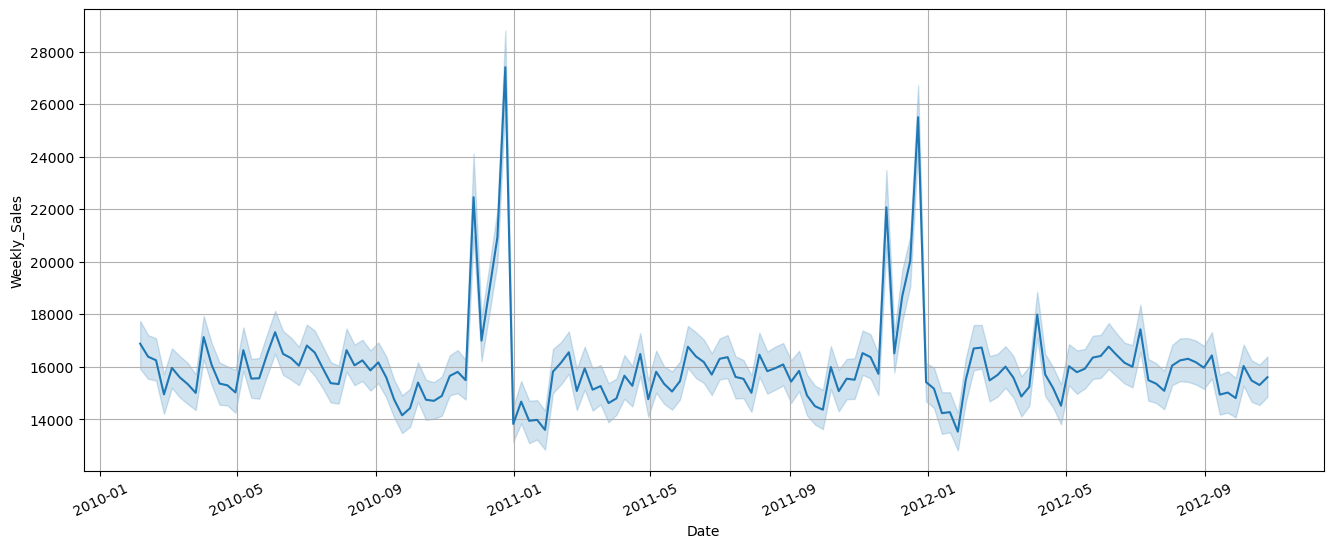

In [63]:
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Plot data
plt.figure(figsize=(16,6))
sns.lineplot(x="Date", y="Weekly_Sales", data=df)
plt.ylabel("Weekly_Sales")
plt.xticks(rotation=25)
plt.grid()

# Simpan file ke dalam folder yang valid
plt.savefig('./grafik/penjualanPerminggu1.png')
plt.show()

### Keterangan Grafik
* penjualan tertinggi: Terdapat lonjakan penjualan yang sangat tinggi pada sekitar awal Januari 2011 dan Januari 2012. Pada periode ini, penjualan Weekly Sales mencapai lebih dari 28,000
* penjualan terendah: Penjualan terendah terjadi pada sekitar Maret 2010 dan Oktober 2012, dengan nilai penjualan berada di kisaran 14,000 - 15,000

In [64]:
# Pastikan kolom Date sudah dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Membuat kolom baru berdasarkan data di kolom Date
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Menampilkan DataFrame hasil
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012


In [65]:
# pengelompokan berdasarkan bulan, untuk mengetahui bulan yang memiliki penjualan terbaik untuk setiap tahunnya
df.groupby('month')['Weekly_Sales'].mean() 

month
1     14182.239153
2     16048.701191
3     15410.700592
4     15677.565462
5     15838.538463
6     16391.474070
7     15877.902886
8     16148.162179
9     15145.364652
10    15292.159216
11    17534.964277
12    19445.404268
Name: Weekly_Sales, dtype: float64

In [66]:
# pengelompokan berdasarkan tahun, untuk mengetahui tahun yang memiliki penjualan terbaik
df.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16010.571543
2012    15726.600798
Name: Weekly_Sales, dtype: float64

<Figure size 1600x600 with 0 Axes>

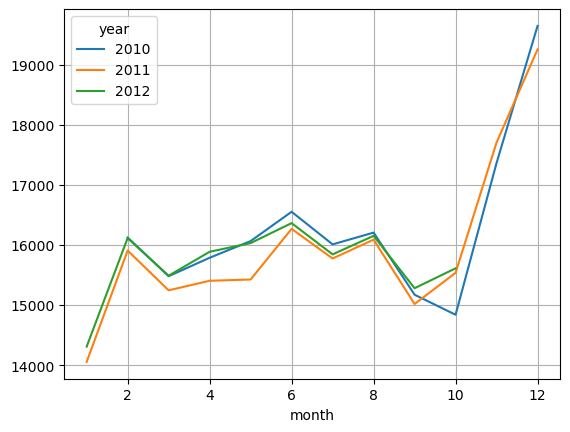

In [67]:
#visualisasi data penjualan, untuk mengetahui tahun yang memiliki penjualan terbaik
plt.figure(figsize=(16,6))
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
plt.savefig('./grafik/penjualanperbulan.png')
monthly_sales.plot()
plt.grid()

###  Dari grafik terlihat penjualan tahun 2011 lebih rendah dari tahun 2010 secara umum. Jika dilihat dari rata-rata penjualan terlihat bahwa tahun 2010 memiliki nilai yang lebih tinggi, namun tahun 2012 tidak ada informasi bulanNovember dan Desember yang memiliki penjualan lebih tinggi. Meskipun tahun 2012 tidak ada penjualan dua bulan terakhir, artinya mendekati tahun 2010. Kemungkinan besar, ini akan menempati posisi pertama jika kita mendapatkan hasil tahun 2012 dan menambahkannya.

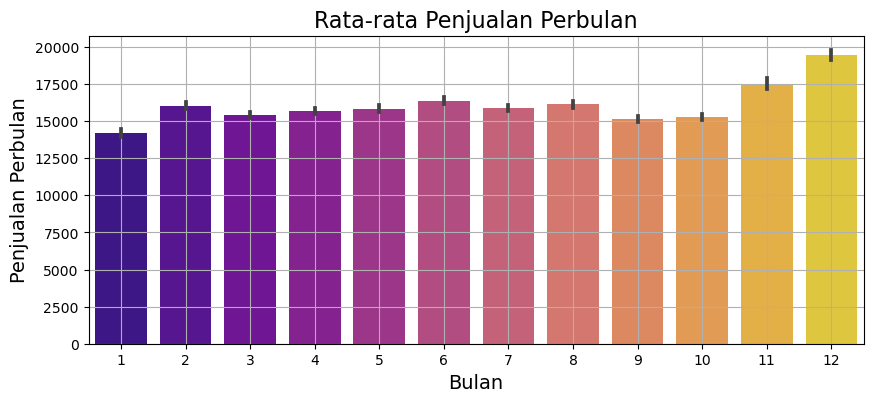

In [68]:
#visualisasi data penjualan, untuk mengetahui bulan dengan tingkat penjualan tertinggi 
#mengganti warna pallatte dengan Seaborn yang disediakan seperti viridis, coolwarm, magma, atau Spectral
plt.figure(figsize=(10, 4))
sns.barplot(x='month', y='Weekly_Sales', data=df, palette='plasma')  # Gunakan palet warna plasma
plt.ylabel('Penjualan Perbulan', fontsize=14)
plt.xlabel('Bulan', fontsize=14)
plt.title('Rata-rata Penjualan Perbulan', fontsize=16)
plt.savefig('./grafik/penjualan-bulan.png')
plt.grid()
plt.show()

## dari grafik di atas, penjualan terbaik adalah pada bulan Desember dan November. terlihat jelas bahwa Desember memiliki nilai terbaik.

In [69]:
# pengelompokan berdasarkan minggu, untuk mengetahui minggu yang memiliki penjualan terbaik untuk setiap bulannya
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18825.033841
22    16839.984822
Name: Weekly_Sales, dtype: float64

<Figure size 1600x600 with 0 Axes>

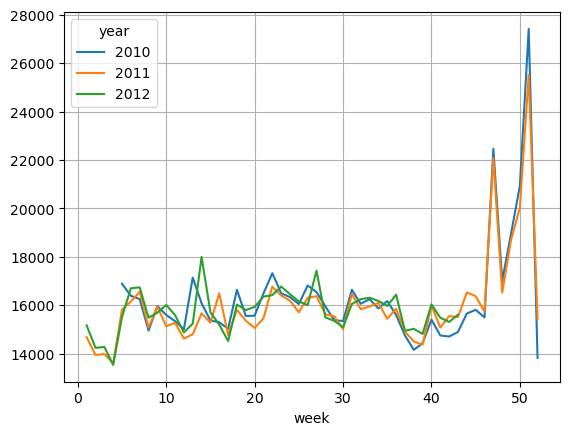

In [70]:
#Visualisasi data penjualan setiap minggu
plt.figure(figsize=(16,6))
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()
plt.savefig('./grafik/penjualan Perminggu.png')
plt.grid()

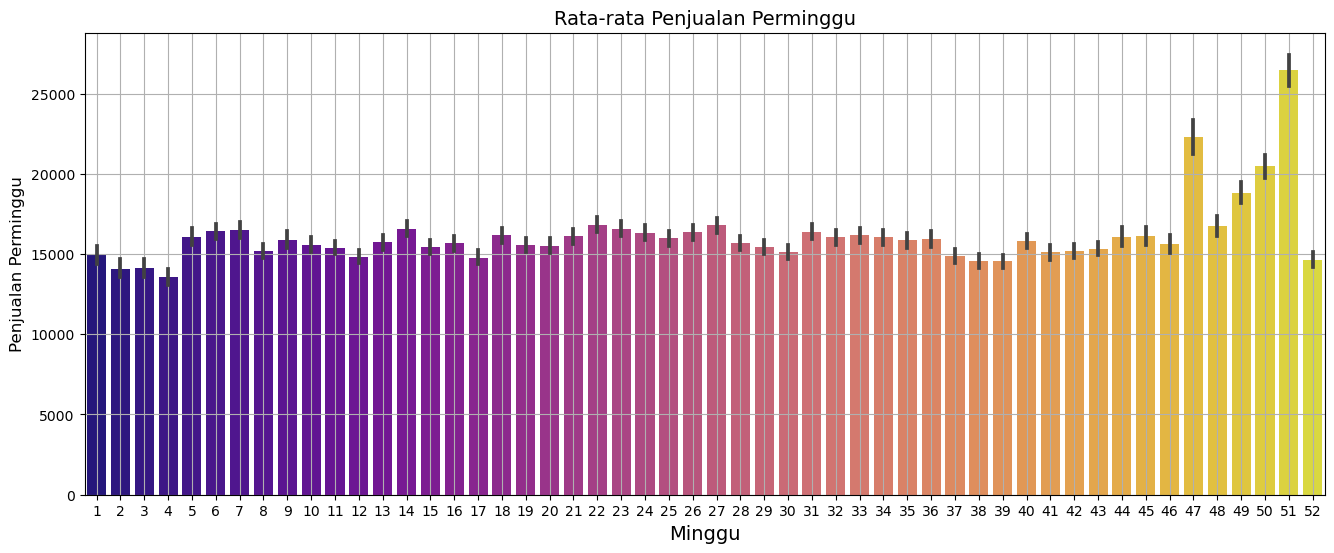

In [71]:
plt.figure(figsize=(16, 6))
sns.barplot(x='week', y='Weekly_Sales', data=df, palette='plasma')  # Menggunakan palet plasma
plt.ylabel('Penjualan Perminggu', fontsize=12)
plt.xlabel('Minggu', fontsize=14)
plt.title('Rata-rata Penjualan Perminggu', fontsize=14)
plt.savefig('./grafik/penjualan-minggu.png')
plt.grid()
plt.show()

* 5 rata-rata penjualan teratas menurut mingguan adalah 1-2 minggu sebelum Natal dan saat hari libur lain.
* Dari grafik, terlihat bahwa minggu ke-51 dan minggu ke-47 memiliki rata-rata yang lebih tinggi secara signifikan sebagai efek hari libur

## 2. Distribusi Data Toko

In [72]:
# melihat nomor departement yang memiliki nilai berbeda
print(df['Store'].unique())
df['Store'].nunique()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


45

### Pada Dataset, terdapat 45 buah toko, dengan pengurutan berdasarkan nomor 1- 45

In [73]:
df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).head()

Store
20    29629.859772
4     29173.565787
14    28933.814000
13    27399.631860
2     26961.734433
Name: Weekly_Sales, dtype: float64

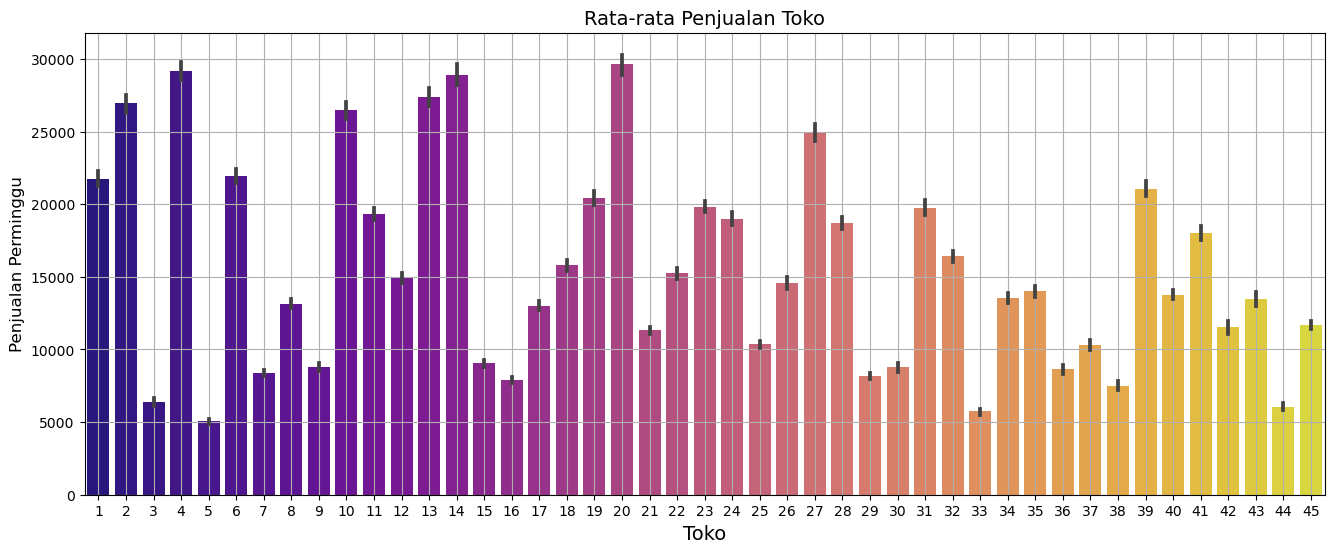

In [74]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=df, palette='plasma')  # Menggunakan palet plasma
plt.ylabel('Penjualan Perminggu', fontsize=12)
plt.xlabel('Toko', fontsize=14)
plt.title('Rata-rata Penjualan Toko', fontsize=14)
plt.savefig('./grafik/penjualan-toko.png')
plt.grid()
plt.show()

###  Berdasarkan visualisasi diatas terlihat bahwa toko dengan penjualan tertinggi adalah
1. toko ke 20 dengan rata-rata penjualan perminggu sebanyak 29629.859772,
2. lalu toko ke 4 dengan rata-rata penjualan perminggu sebanyak 29173.565787,
3. lalu toko 14 dengan rata-rata penjualan perminggu sebanyak 28933.814000,
4. kemudian toko ke 13 dengan rata-rata penjualan perminggu sebanyak 27399.631860
5. toko 2 dengan rata-rata penjualan perminggu sebanyak 26961.734433

## 3. Distribusi Data Departemen

In [75]:
# melihat nomor departement yang memiliki nilai berbeda
print(df['Dept'].unique())
df['Dept'].nunique()


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 79 80 81 82 83 85 87 90 91 92 93 94 95 97
 98 78 96 99 77 39 50 43 65]


81

### dari dataset yang terlihat bahwa ada 45 toko dengan 81 departemen untuk setiap toko. dimana pengurutan nomor departemen dimulai dari angka 1-99, tetapi terdapat nomor yang tidak tersedia seperti nomor 15, 39 dan nomor lainnya

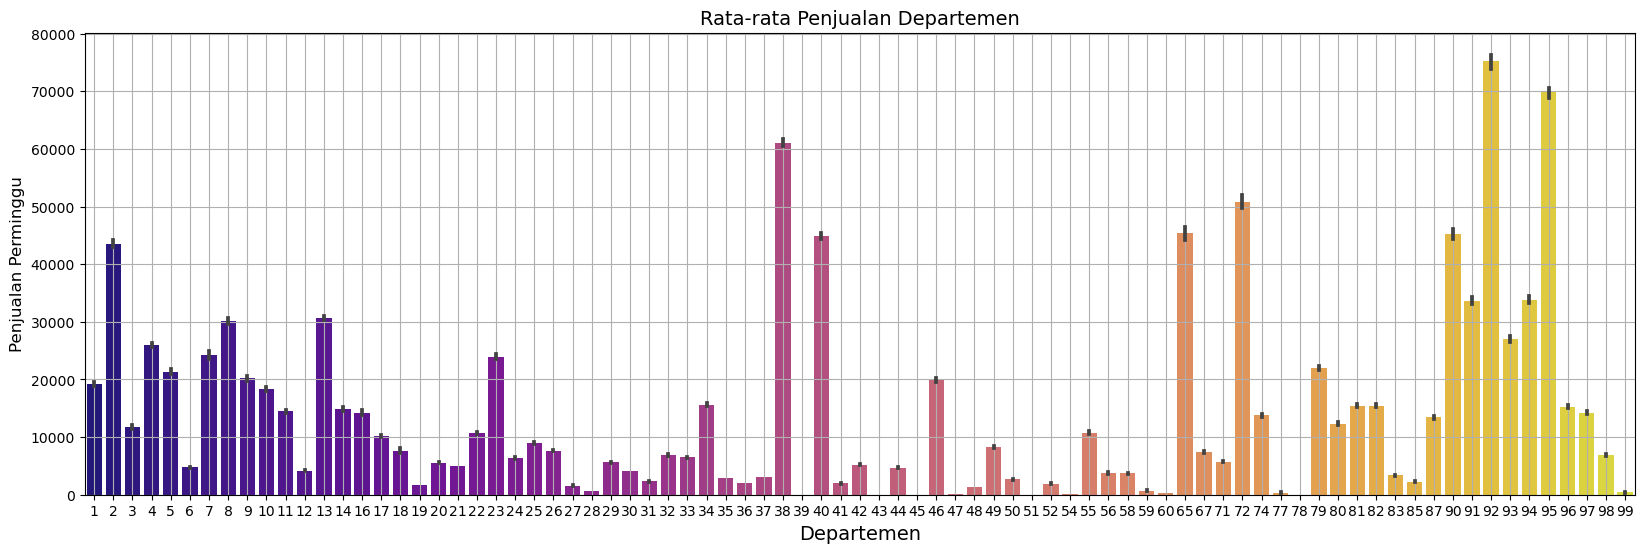

In [76]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=df, palette='plasma')  # Menggunakan palet plasma
plt.ylabel('Penjualan Perminggu', fontsize=12)
plt.xlabel('Departemen', fontsize=14)
plt.title('Rata-rata Penjualan Departemen', fontsize=14)
plt.savefig('./grafik/penjualan-Dept.png')
plt.grid()
plt.show()

## 4. Distribusi Data Hari Libur(Is Holiday)

In [77]:
df_holiday = df.loc[df['IsHoliday']==True]
print(df_holiday['Date'].nunique())
df_holiday['Date'].unique()

10


array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

### Informasi Hari Libur dalam Dataframe

- **Total hari libur unik:** 10  
- **Tanggal-tanggal hari libur:**  
  1. 12 Februari 2010  
  2. 10 September 2010  
  3. 26 November 2010  
  4. 31 Desember 2010  
  5. 11 Februari 2011  
  6. 9 September 2011  
  7. 25 November 2011  
  8. 30 Desember 2011  
  9. 10 Februari 2012  
  10. 7 September 2012  

In [78]:
df_holiday = df.loc[df['IsHoliday']==False]
print(df_holiday['Date'].nunique())
#df_holiday['Date'].unique()


133


### Informasi Hari Non-Libur dalam Dataframe

- **Total hari non-libur unik:** 133  
- Data ini mencakup tanggal-tanggal di mana IsHoliday bernilai False, yaitu hari kerja atau bukan hari libur dalam dataset.


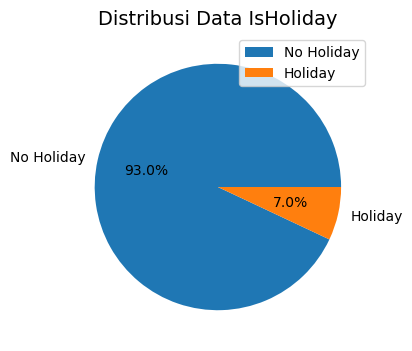

In [79]:
plt.figure(figsize=(8,4))
plt.pie(df['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.1f%%')
plt.title("Distribusi Data IsHoliday",fontsize=14)
plt.legend()
plt.savefig('./grafik/holiday_distribution.png')
plt.show() 

* Dari visualisasi diatas terlihat ada 7% hari libur dari total keseluruhan data
* Terdapat 4 hari libur dalam setahun yaitu :
1. tahun 2010 pada tanggal 12 Febuari, 10 september, 26 November dan 31 Desember
2. tahun 2011
3. tahun 2012


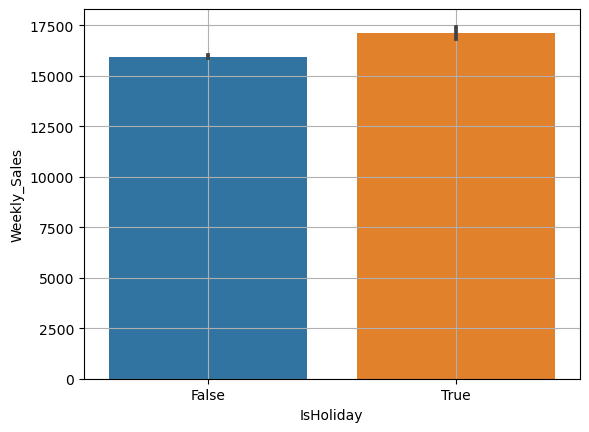

In [80]:
plt.figure(10,)
sns.barplot(x ='IsHoliday', y ='Weekly_Sales', data=df)
plt.grid()
plt.savefig('./grafik/IsHoliday.png')
plt.show()

### Analisis Penjualan Mingguan Berdasarkan Hari Libur

- Grafik menunjukkan perbandingan **penjualan mingguan** (`Weekly_Sales`) pada hari libur (`IsHoliday=True`) dan hari biasa (`IsHoliday=False`).
- Rata-rata penjualan pada hari libur tampak **sedikit lebih tinggi** dibandingkan hari biasa.
- Perbedaan ini bisa menunjukkan bahwa selama hari libur, tingkat belanja meningkat.
- **Kesimpulan:** Hari libur berpotensi meningkatkan penjualan mingguan, meskipun selisihnya tidak terlalu besar.


# Tipe Toko, Size

In [81]:
#menampilkan data ukuran dan tipe toko
df.groupby('Type').describe()['Size'].round(2)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,201437.0,191123.99,21987.71,151315.0,184109.0,203007.0,204184.0,219622.0
B,144179.0,109945.22,21763.58,57197.0,93638.0,118221.0,125833.0,140167.0
C,73038.0,39328.48,2145.50,34875.0,39690.0,39690.0,39910.0,42988.0


### Statistik Ukuran Toko Berdasarkan Tipe

Data ini menunjukkan statistik deskriptif ukuran toko (`Size`) berdasarkan tipe toko (`Type`):

- **Tipe A**  
  - Jumlah toko: **201,437**  
  - Rata-rata ukuran: **191,123.99**  
  - Ukuran minimum: **151,315**  
  - Ukuran maksimum: **219,622**  
  - Standar deviasi: **21,987.71**  
  - Toko dalam tipe ini memiliki ukuran terbesar dibandingkan tipe lain.

- **Tipe B**  
  - Jumlah toko: **144,179**  
  - Rata-rata ukuran: **109,945.22**  
  - Ukuran minimum: **57,197**  
  - Ukuran maksimum: **140,167**  
  - Standar deviasi: **21,763.58**  
  - Ukuran toko tipe B lebih kecil dari tipe A tetapi lebih besar dari tipe C.

- **Tipe C**  
  - Jumlah toko: **73,038**  
  - Rata-rata ukuran: **39,328.48**  
  - Ukuran minimum: **34,875**  
  - Ukuran maksimum: **42,988**  
  - Standar deviasi: **2,145.50**  
  - Toko tipe C memiliki ukuran terkecil dengan variasi ukuran yang lebih rendah dibandingkan tipe lainnya.


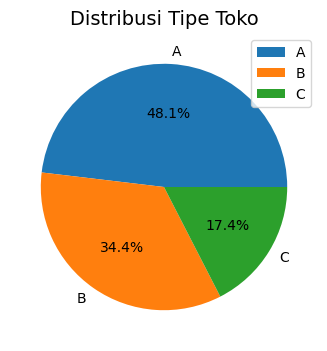

In [82]:
plt.figure(figsize=(8,4))
plt.pie(df['Type'].value_counts(),labels=['A','B','C'],autopct='%0.1f%%')
plt.title("Distribusi Tipe Toko",fontsize=14)
plt.legend()
plt.savefig('./grafik/Tipe Toko.png')
plt.show() 

### Distribusi Tipe Toko

- Tipe A: 48.1% (terbanyak)  
- Tipe B: 34.4%  
- Tipe C: 17.4% (paling sedikit)  

**Kesimpulan:** Tipe A mendominasi, sedangkan tipe C paling sedikit


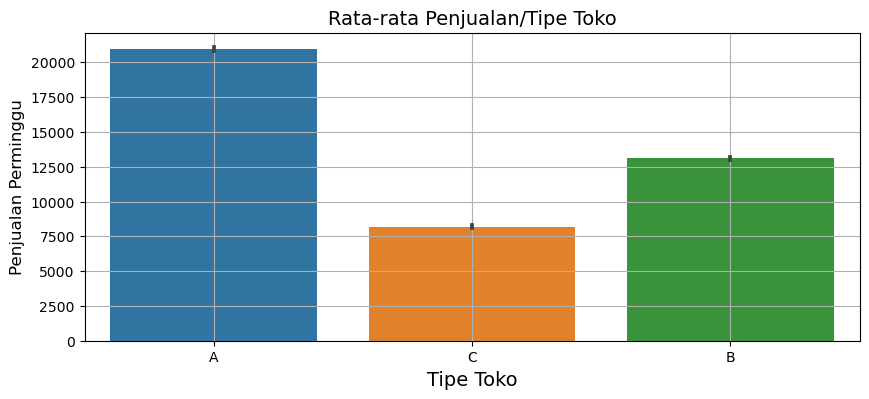

In [83]:
#visualisasi data penjualan, untuk mengetahui toko dengan tingkat penjualan tertinggi
plt.figure(figsize=(10,4))
sns.barplot(x='Type',y='Weekly_Sales',data=df)
plt.ylabel('Penjualan Perminggu',fontsize=12)
plt.xlabel('Tipe Toko',fontsize=14)
plt.title('Rata-rata Penjualan/Tipe Toko',fontsize=14)
plt.savefig('./grafik/penjualan-Type.png')
plt.grid()

### Rata-rata Penjualan per Tipe Toko

- Tipe A: memiliki rata-rata penjualan tertinggi.  
- Tipe B: berada di posisi tengah.  
- Tipe C: memiliki rata-rata penjualan terendah.  

**Kesimpulan:** Toko tipe A lebih unggul dalam penjualan mingguan dibanding tipe lainnya.


In [84]:
# pengelompokan berdasarkan minggu, untuk mengetahui minggu yang memiliki penjualan terbaik untuk setiap bulannya
df.groupby('Type')['Weekly_Sales'].mean().sort_values(ascending=False).head()

Type
A    20963.289974
B    13102.900104
C     8194.630544
Name: Weekly_Sales, dtype: float64

### Rata-rata Penjualan Mingguan per Tipe Toko

- Tipe A: 20,963 (tertinggi)  
- Tipe B: 13,102  
- Tipe C: 8,194 (terendah)  

**Kesimpulan:** Toko tipe A memiliki penjualan mingguan tertinggi, sedangkan tipe C terendah.


# Fuel price

In [85]:
df.groupby('Fuel_Price')['Weekly_Sales'].mean().sort_values(ascending=False).head()

Fuel_Price
3.141    35776.416348
2.887    35499.735448
3.309    33488.388803
3.225    29796.562671
3.587    29554.704552
Name: Weekly_Sales, dtype: float64

### Kode di atas mengelompokkan data berdasarkan kolom 'Fuel_Price' dan menghitung rata-rata 'Weekly_Sales' untuk setiap kelompok harga bahan bakar. Hasilnya diurutkan dari rata-rata penjualan mingguan tertinggi hingga terendah, dan hanya menampilkan lima nilai teratas.

### Harga bahan bakar dengan nilai rata-rata penjualan mingguan tertinggi adalah 3.141, diikuti oleh 2.887, 3.309, 3.225, dan 3.587.


In [86]:
df['Fuel_Price'].describe()

count    418654.000000
mean          3.359308
std           0.458387
min           2.472000
25%           2.931000
50%           3.452000
75%           3.735000
max           4.468000
Name: Fuel_Price, dtype: float64

### Fungsi describe() digunakan untuk menghasilkan statistik deskriptif dari kolom 'Fuel_Price'

- count: 418,654 data
- mean: 3.359308 (nilai rata-rata harga bahan bakar)
- std: 0.458387 (simpangan baku yang menunjukkan seberapa besar variasi harga bahan bakar)
- min: 2.472000 (harga bahan bakar terendah)
- 25%: 2.931000 (kuartil pertama)
- 50%: 3.452000 (median atau kuartil kedua)
- 75%: 3.735000 (kuartil ketiga)
- max: 4.468000 (harga bahan bakar tertinggi)


<AxesSubplot: xlabel='Fuel_Price'>

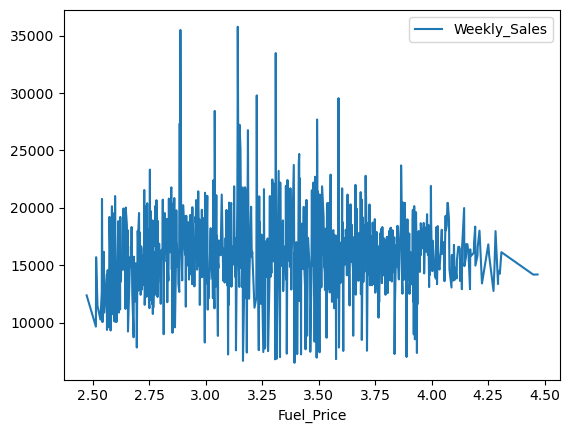

In [87]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

#Kode di atas membuat tabel pivot dengan menggunakan kolom 'Fuel_Price' sebagai indeks dan menghitung nilai rata-rata dari 'Weekly_Sales' untuk setiap harga bahan bakar. Kemudian, fungsi `plot()` digunakan untuk membuat grafik dari hasil pivot tersebut,
#dengan sumbu x menunjukkan harga bahan bakar dan sumbu y menunjukkan rata-rata penjualan mingguan.


# MarkDown1 (Promo/Penurunan Harga 1)
# MarkDown1-5
* Merupakan feature/kolom yang berisi penurunan harga atau diskon yang tersedia didataset
* feature/kolom ini bertipe float (bilangan pecahan), untuk melakukan analisa dan eksplorasi dengan lebih detailterhadap kolom ini, perlu dilakukan perubahan tipe data menjadi boolean

In [88]:
df.groupby('IsHoliday')[['MarkDown1', 'Weekly_Sales']].mean()

,MarkDown1,Weekly_Sales
IsHoliday,,
False,2583.846447,15947.332465
True,2470.910012,17109.851291


### Dari hasil pengelompokan data berdasarkan hari libur, terlihat bahwa
### pada hari dimana bukan hari libur terdapat nilai rata-rata promo sebesar 0.351948 dengan rata-rata nilai penjualan mingguan sebesar 15947.332465
### sedangkan pada hari libur terdapat nilai rata-rata promo sebesar 0.397166 dengan rata-rata nilai penjualan mingguan sebesar 17109.851291

In [89]:
#casting data/mengubah nilai feature MarkDown1 mmenjadi boolean
data1=df
data1['MarkDown1']= data1['MarkDown1'].apply(lambda x: True if x > 0 else False)
data1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,False,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,False,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,False,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,False,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,False,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,True,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,True,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,True,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,True,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012


In [90]:
data1['MarkDown1'].value_counts()

False    269985
True     148669
Name: MarkDown1, dtype: int64

### Dari total data sebanyak 418654, terdapat sebanyak 269985 data bernilai false(tidak promo) dan sebanyak 148669 data bernilai true (terdapat promo)


## Tahap Visualisasi

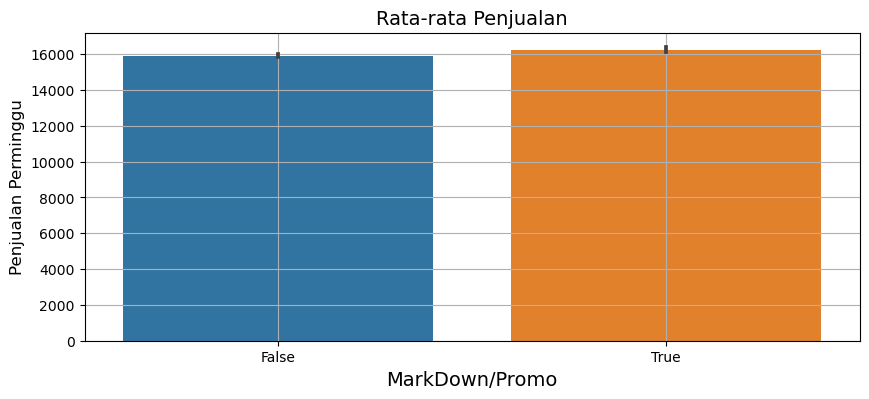

In [91]:
#visualisasi data penjualan, untuk mengetahui toko dengan tingkat penjualan tertinggi
plt.figure(figsize=(10,4))
sns.barplot(x='MarkDown1', y='Weekly_Sales', data=data1)
plt.ylabel('Penjualan Perminggu', fontsize=12)
plt.xlabel('MarkDown/Promo', fontsize=14)
plt.title('Rata-rata Penjualan', fontsize=14)
plt.savefig('./grafik/promo1-penjualan.png')
plt.grid()


In [92]:
data1.groupby('MarkDown1')['Weekly_Sales'].mean()

MarkDown1
False    15903.106976
True     16256.680042
Name: Weekly_Sales, dtype: float64

### Distribusi Data MarkDown1
### Dari visualisasi data diatas terlihat bahwa, terjadi peningkatan penjualan ketika terdapat promo
### Dimana rata-rata penjualan ketika tidak terdapat promo sebesar 15903.11,sedangkan saat terdapat promo rata-rata penjualan sebesar 16256.68 terjadi peningkatan sebesar 353.5699


In [93]:
#menampilkan jumlah kemunculan (frekuensi) data string didalam sebuah kolom
data1.groupby('IsHoliday')['MarkDown1'].value_counts()

IsHoliday  MarkDown1
False      False        252328
           True         137036
True       False         17657
           True          11633
Name: MarkDown1, dtype: int64

### Dari total data sebanyak 418654 baris data,setelah di kelompokan berdasakan hari libur, terdapat
1. sebanyak 252328 data masuk kedalam kategori BUKAN HARI LIBUR dan juga TIDAK ADA PROMO
2. sebanyak 137036 data masuk kedalam kategori BUKAN HARI LIBUR tetapi ADA PROMO
3. sebanyak 17657 data masuk kedalam kategori HARI LIBUR tetapi TIDAK ADA PROMO
4. sebanyak 11633 data masuk kedalam kategori HARI LIBUR dan juga ADA PROMO

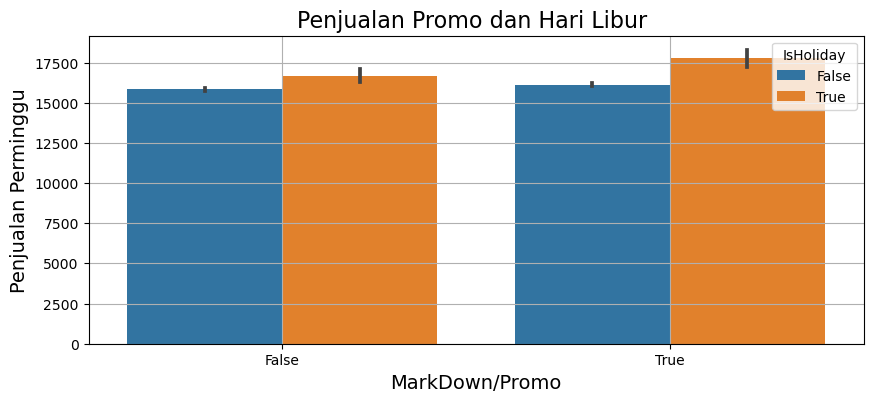

In [94]:
plt.figure(figsize=(10,4))
sns.barplot(x='MarkDown1',y='Weekly_Sales',hue='IsHoliday',data=df)
plt.ylabel('Penjualan Perminggu',fontsize=14)
plt.xlabel('MarkDown/Promo',fontsize=14)
plt.title('Penjualan Promo dan Hari Libur ',fontsize=16)
plt.savefig('./grafik/penjualan-promo-libur.png')
plt.grid()

In [95]:
group_data = data1.groupby(['IsHoliday', 'MarkDown1'])['Weekly_Sales'].mean().reset_index()
group_data


,IsHoliday,MarkDown1,Weekly_Sales
0,False,False,15848.270724
1,False,True,16129.737461
2,True,False,16686.746433
3,True,True,17752.055578


### Distribusi Data IsHoliday dan MarkDown1
### Dari visualisasi diatas terlihat bahwa penjualan tertinggi berada pada kategori hari libur dan juga terdapat promo, dengan rincian sbb:
1. rata-rata penjualan pada kategori yang BUKAN HARI LIBUR dan juga TIDAK ADA PROMO sebesar 15848.27
2. rata-rata penjualan pada kategori yang BUKAN HARI LIBUR tetapi ADA PROMO sebesar 16129.73
3. rata-rata penjualan pada kategori yang merupakan HARI LIBUR tetapi TIDAK ADA PROMO sebesar 16686.74
4. rata-rata penjualan pada kategori yang merupakan HARI LIBUR dan juga ADA PROMO sebesar 17752.055

# MarkDown2 (Promo/Penurunan Harga 2)

In [96]:
df['MarkDown2'].describe().round(2)

count    418654.00
mean        882.16
std        5086.08
min           0.00
25%           0.00
50%           0.00
75%           2.63
max      104519.54
Name: MarkDown2, dtype: float64

In [97]:
df.groupby('IsHoliday')[['MarkDown2', 'Weekly_Sales']].mean().round(2)

,MarkDown2,Weekly_Sales
IsHoliday,,
False,591.29,15947.33
True,4748.79,17109.85


### Dari hasil pengelompokan data berdasarkan hari libur, terlihat bahwa
### pada hari dimana bukan hari libur terdapat nilai rata-rata promo sebesar 591.29 dengan rata-rata nilai penjualan mingguan sebesar 15947.33
### sedangkan pada hari libur terdapat nilai rata-rata promo sebesar 4748.79 dengan rata-rata nilai penjualan mingguan sebesar 17109.85


In [98]:
#casting data/mengubah nilai feature MarkDown1 mmenjadi boolean
data1=df
data1['MarkDown2']= data1['MarkDown2'].apply(lambda x: True if x > 0 else False)
data1


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,False,False,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,False,False,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,False,False,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,False,False,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,False,False,0.0,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,True,True,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,True,True,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,True,True,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,True,True,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012


In [99]:
data1['MarkDown2'].value_counts()

False    309401
True     109253
Name: MarkDown2, dtype: int64

### Dari total data sebanyak 418654, terdapat sebanyak 309401 data bernilai false(tidak promo) dan sebanyak 109253 data bernilai true (terdapat promo)

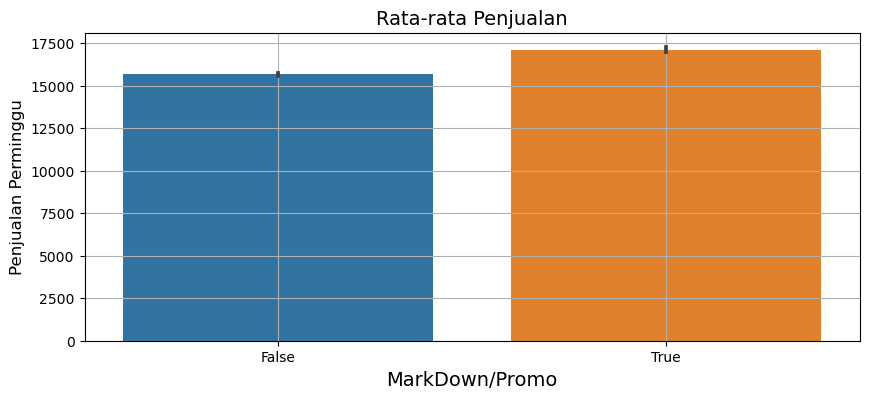

In [100]:
#visualisasi data penjualan, untuk mengetahui toko dengan tingkat penjualan tertinggi
plt.figure(figsize=(10,4))
sns.barplot(x='MarkDown2',y='Weekly_Sales',data=data1)
plt.ylabel('Penjualan Perminggu',fontsize=12)
plt.xlabel('MarkDown/Promo',fontsize=14)
plt.title('Rata-rata Penjualan',fontsize=14)
plt.savefig('./grafik/promo1-penjualan.png')
plt.grid()


In [101]:
data1.groupby('MarkDown2')['Weekly_Sales'].mean().round(2)

MarkDown2
False    15649.56
True     17102.28
Name: Weekly_Sales, dtype: float64

### Distribusi Data MarkDown2
### Dari visualisasi data diatas terlihat bahwa, terjadi peningkatan penjualan ketika terdapat promo
### Dimana rata-rata penjualan ketika tidak terdapat promo sebesar 15649.56,sedangkan saat terdapat promo rata-rata penjualan sebesar 17102.28

In [102]:
#menampilkan jumlah kemunculan (frekuensi) data string didalam sebuah kolom
data1.groupby('IsHoliday')['MarkDown2'].value_counts()

IsHoliday  MarkDown2
False      False        290391
           True          98973
True       False         19010
           True          10280
Name: MarkDown2, dtype: int64

### Dari total data sebanyak 418654 baris data,setelah di kelompokan berdasakan hari libur, terdapat
1. sebanyak 290391 data masuk kedalam kategori BUKAN HARI LIBUR dan juga TIDAK ADA PROMO
2. sebanyak 98973 data masuk kedalam kategori BUKAN HARI LIBUR tetapi ADA PROMO
3. sebanyak 19010 data masuk kedalam kategori HARI LIBUR tetapi TIDAK ADA PROMO
4. sebanyak 10280 data masuk kedalam kategori HARI LIBUR dan juga ADA PROMO

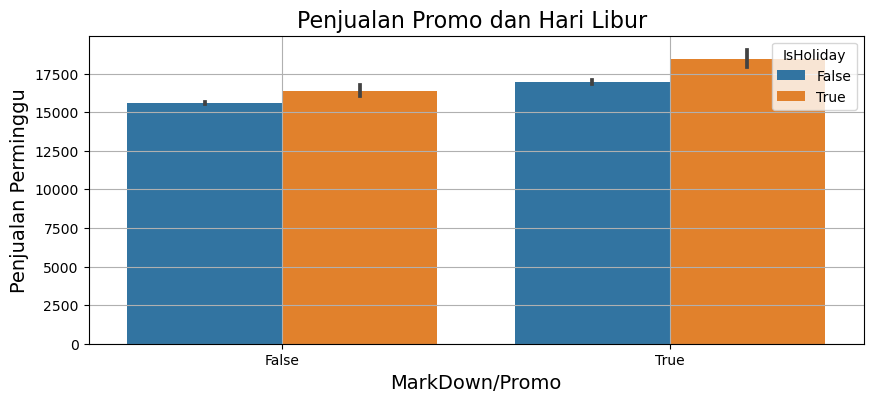

In [103]:
plt.figure(figsize=(10,4))
sns.barplot(x='MarkDown2',y='Weekly_Sales',hue='IsHoliday',data=df)
plt.ylabel('Penjualan Perminggu',fontsize=14)
plt.xlabel('MarkDown/Promo',fontsize=14)
plt.title('Penjualan Promo dan Hari Libur ',fontsize=16)
plt.savefig('./grafik/penjualan-promo-libur.png')
plt.grid()

In [104]:
group_data = data1.groupby(['IsHoliday', 'MarkDown2'])['Weekly_Sales'].mean().round(2).reset_index()
group_data

,IsHoliday,MarkDown2,Weekly_Sales
0,False,False,15601.36
1,False,True,16962.44
2,True,False,16385.88
3,True,True,18448.63


### Distribusi Data IsHoliday dan MarkDown2
### Dari visualisasi diatas terlihat bahwa penjualan tertinggi berada pada kategori hari libur dan juga terdapat promo, dengan rincian sbb:
1. rata-rata penjualan pada kategori yang BUKAN HARI LIBUR dan juga TIDAK ADA PROMO sebesar 15601.36
2. rata-rata penjualan pada kategori yang BUKAN HARI LIBUR tetapi ADA PROMO sebesar 16962.44
3. rata-rata penjualan pada kategori yang merupakan HARI LIBUR tetapi TIDAK ADA PROMO sebesar 16385.88
4. rata-rata penjualan pada kategori yang merupakan HARI LIBUR dan juga ADA PROMO sebesar 18448.63

# MarkDown3 (Promo/Penurunan Harga 3)

In [105]:
df['MarkDown3'].describe().round(2)

count    418654.00
mean        470.48
std        5544.29
min           0.00
25%           0.00
50%           0.00
75%           4.36
max      141630.61
Name: MarkDown3, dtype: float64

In [106]:
df.groupby('IsHoliday')[['MarkDown3', 'Weekly_Sales']].mean().round(2)

,MarkDown3,Weekly_Sales
IsHoliday,,
False,62.91,15947.33
True,5888.36,17109.85


### Dari hasil pengelompokan data berdasarkan hari libur, terlihat bahwa
### pada hari dimana bukan hari libur terdapat nilai rata-rata promo sebesar 62.91 dengan rata-rata nilai penjualan mingguan sebesar 15947.33
### sedangkan pada hari libur terdapat nilai rata-rata promo sebesar 5888.36 dengan rata-rata nilai penjualan mingguan sebesar 17109.85


In [107]:
#casting data/mengubah nilai feature MarkDown1 mmenjadi boolean
data1=df
data1['MarkDown3']= data1['MarkDown3'].apply(lambda x: True if x > 0 else False)
data1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,False,False,False,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,False,False,False,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,False,False,False,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,False,False,False,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,False,False,False,0.00,0.00,211.096358,8.106,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,True,True,True,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,True,True,True,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,True,True,True,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,True,True,True,211.94,858.33,192.308899,8.667,B,118221,43,10,2012


In [108]:
data1['MarkDown3'].value_counts()

False    283492
True     135162
Name: MarkDown3, dtype: int64

### Dari total data sebanyak 418654, terdapat sebanyak 283492 data bernilai False (tidak promo) dan sebanyak 135162 data bernilai True (terdapat promo).


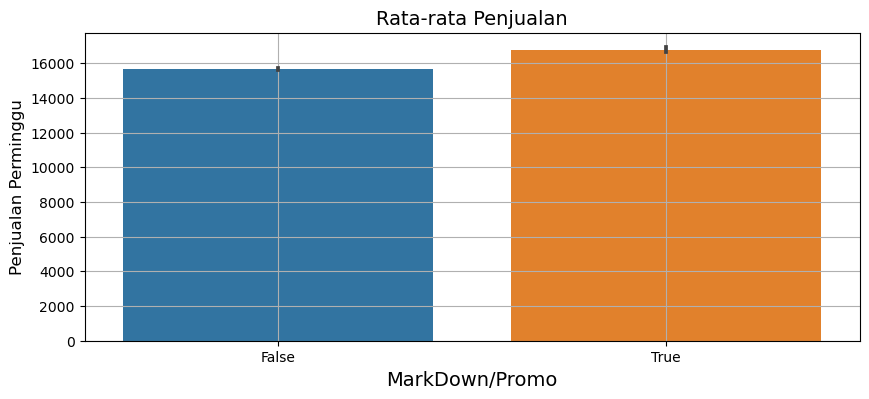

In [109]:
#visualisasi data penjualan, untuk mengetahui toko dengan tingkat penjualan tertinggi
plt.figure(figsize=(10,4))
sns.barplot(x='MarkDown3',y='Weekly_Sales',data=data1)
plt.ylabel('Penjualan Perminggu',fontsize=12)
plt.xlabel('MarkDown/Promo',fontsize=14)
plt.title('Rata-rata Penjualan',fontsize=14)
plt.savefig('./grafik/promo1-penjualan.png')
plt.grid()

In [110]:
data1.groupby('MarkDown3')['Weekly_Sales'].mean().round(2)

MarkDown3
False    15669.74
True     16781.48
Name: Weekly_Sales, dtype: float64

### Distribusi Data MarkDown3  
### Dari hasil pengelompokan data di atas terlihat bahwa, terjadi peningkatan penjualan ketika terdapat promo.  
### Dimana rata-rata penjualan ketika tidak terdapat promo sebesar 15669.74, sedangkan saat terdapat promo rata-rata penjualan sebesar 16781.48.



In [111]:
#menampilkan jumlah kemunculan (frekuensi) data string didalam sebuah kolom
data1.groupby('IsHoliday')['MarkDown3'].value_counts()


IsHoliday  MarkDown3
False      False        265350
           True         124014
True       False         18142
           True          11148
Name: MarkDown3, dtype: int64

### Dari total data sebanyak 418654 baris data, setelah dikelompokkan berdasarkan hari libur, terdapat:  
1. Sebanyak 265350 data masuk ke dalam kategori BUKAN HARI LIBUR dan juga TIDAK ADA PROMO.  
2. Sebanyak 124014 data masuk ke dalam kategori BUKAN HARI LIBUR tetapi ADA PROMO.  
3. Sebanyak 18142 data masuk ke dalam kategori HARI LIBUR tetapi TIDAK ADA PROMO.  
4. Sebanyak 11148 data masuk ke dalam kategori HARI LIBUR dan juga ADA PROMO.


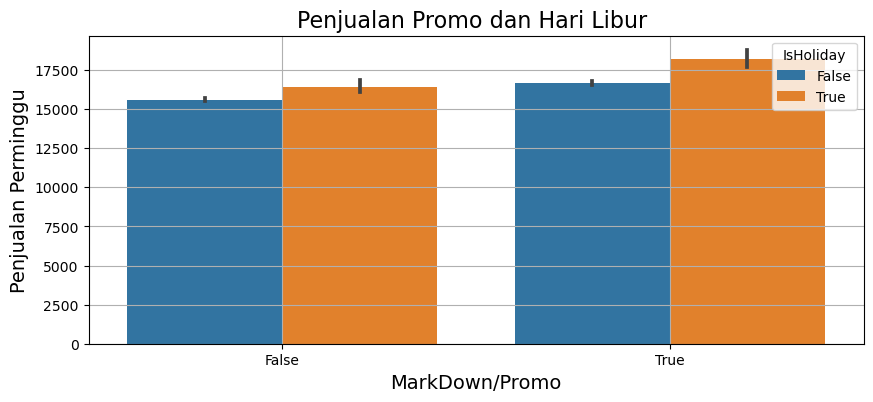

In [112]:
plt.figure(figsize=(10,4))
sns.barplot(x='MarkDown3',y='Weekly_Sales',hue='IsHoliday',data=df)
plt.ylabel('Penjualan Perminggu',fontsize=14)
plt.xlabel('MarkDown/Promo',fontsize=14)
plt.title('Penjualan Promo dan Hari Libur ',fontsize=16)
plt.savefig('./grafik/penjualan-promo-libur.png')
plt.grid()

In [113]:
group_data = data1.groupby(['IsHoliday', 'MarkDown3'])['Weekly_Sales'].mean().round(2).reset_index()
group_data


,IsHoliday,MarkDown3,Weekly_Sales
0,False,False,15617.04
1,False,True,16654.04
2,True,False,16440.53
3,True,True,18199.09


### Dari visualisasi diatas terlihat bahwa penjualan tertinggi berada pada kategori hari libur dan juga terdapat promo, dengan rincian sbb:

1. Rata-rata penjualan pada kategori yang BUKAN HARI LIBUR dan juga TIDAK ADA PROMO sebesar 15617.04  
2. Rata-rata penjualan pada kategori yang BUKAN HARI LIBUR tetapi ADA PROMO sebesar 16654.04  
3. Rata-rata penjualan pada kategori yang HARI LIBUR tetapi TIDAK ADA PROMO sebesar 16440.53  
4. Rata-rata penjualan pada kategori yang HARI LIBUR dan juga ADA PROMO sebesar 18199.09


# MarkDown4 (Promo/Penurunan Harga 4)

In [114]:
df['MarkDown4'].describe().round(2)

count    418654.00
mean       1080.16
std        3901.83
min           0.00
25%           0.00
50%           0.00
75%         415.36
max       67474.85
Name: MarkDown4, dtype: float64

In [115]:
df.groupby('IsHoliday')[['MarkDown4', 'Weekly_Sales']].mean().round(2)

,MarkDown4,Weekly_Sales
IsHoliday,,
False,1067.80,15947.33
True,1244.37,17109.85


### Dari hasil pengelompokan data berdasarkan hari libur, terlihat bahwa:
### Pada hari dimana bukan hari libur, terdapat nilai rata-rata promo sebesar 1067.80, dengan rata-rata nilai penjualan mingguan sebesar 15947.33.
### Sedangkan pada hari libur, terdapat nilai rata-rata promo sebesar 1244.37, dengan rata-rata nilai penjualan mingguan sebesar 17109.85.

In [116]:
#casting data/mengubah nilai feature MarkDown1 mmenjadi boolean
data1=df
data1['MarkDown4']= data1['MarkDown4'].apply(lambda x: True if x > 0 else False)
data1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,False,False,False,False,0.00,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,False,False,False,False,0.00,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,False,False,False,False,0.00,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,False,False,False,False,0.00,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,False,False,False,False,0.00,211.096358,8.106,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,True,True,True,True,858.33,192.308899,8.667,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,True,True,True,True,858.33,192.308899,8.667,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,True,True,True,True,858.33,192.308899,8.667,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,True,True,True,True,858.33,192.308899,8.667,B,118221,43,10,2012


In [117]:
data1['MarkDown4'].value_counts()

False    285648
True     133006
Name: MarkDown4, dtype: int64

### Dari total data sebanyak 418654, terdapat sebanyak 285648 data bernilai False (tidak ada promo) dan sebanyak 133006 data bernilai True (terdapat promo)

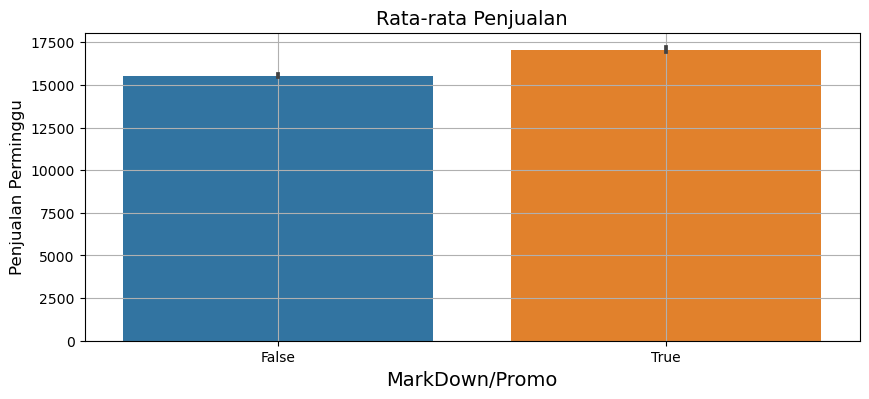

In [118]:
#visualisasi data penjualan, untuk mengetahui toko dengan tingkat penjualan tertinggi
plt.figure(figsize=(10,4))
sns.barplot(x='MarkDown4',y='Weekly_Sales',data=data1)
plt.ylabel('Penjualan Perminggu',fontsize=12)
plt.xlabel('MarkDown/Promo',fontsize=14)
plt.title('Rata-rata Penjualan',fontsize=14)
plt.savefig('./grafik/promo1-penjualan.png')
plt.grid()

In [119]:
data1.groupby('MarkDown4')['Weekly_Sales'].mean().round(2)

MarkDown4
False    15540.00
True     17078.14
Name: Weekly_Sales, dtype: float64

### Distribusi Data MarkDown4
### Dari visualisasi data di atas terlihat bahwa terjadi peningkatan penjualan ketika terdapat promo.
### Dimana rata-rata penjualan ketika tidak terdapat promo sebesar 15540.00, sedangkan saat terdapat promo, rata-rata penjualan sebesar 17078.14

In [120]:
#menampilkan jumlah kemunculan (frekuensi) data string didalam sebuah kolom
data1.groupby('IsHoliday')['MarkDown4'].value_counts()

IsHoliday  MarkDown4
False      False        267020
           True         122344
True       False         18628
           True          10662
Name: MarkDown4, dtype: int64

### Dari total data sebanyak 418654 baris data, setelah dikelompokkan berdasarkan hari libur, terdapat:

1. Sebanyak 267020 data masuk ke dalam kategori BUKAN HARI LIBUR dan juga TIDAK ADA PROMO.
2. Sebanyak 122344 data masuk ke dalam kategori BUKAN HARI LIBUR tetapi ADA PROMO.
3. Sebanyak 18628 data masuk ke dalam kategori HARI LIBUR tetapi TIDAK ADA PROMO.
4. Sebanyak 10662 data masuk ke dalam kategori HARI LIBUR dan juga ADA PROMO.

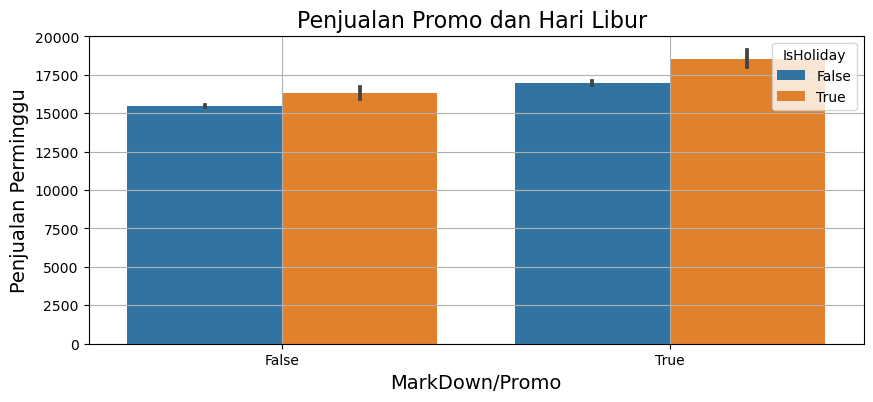

In [121]:
plt.figure(figsize=(10,4))
sns.barplot(x='MarkDown4',y='Weekly_Sales',hue='IsHoliday',data=df)
plt.ylabel('Penjualan Perminggu',fontsize=14)
plt.xlabel('MarkDown/Promo',fontsize=14)
plt.title('Penjualan Promo dan Hari Libur ',fontsize=16)
plt.savefig('./grafik/penjualan-promo-libur.png')
plt.grid()

In [122]:
group_data = data1.groupby(['IsHoliday', 'MarkDown4'])['Weekly_Sales'].mean().round(2).reset_index()
group_data

,IsHoliday,MarkDown4,Weekly_Sales
0,False,False,15486.14
1,False,True,16953.90
2,True,False,16312.02
3,True,True,18503.78


### Distribusi Data IsHoliday dan MarkDown4 
### Berdasarkan visualisasi di atas, dapat dilihat bahwa penjualan tertinggi terjadi pada kategori hari libur dengan adanya promo. Rinciannya sebagai berikut:  
1. Rata-rata penjualan pada kategori bukan hari libur dan tidak ada promo sebesar 15,486.14 
2. Rata-rata penjualan pada kategori bukan hari libur tetapi ada promo sebesar 16,953.90 
3. Rata-rata penjualan pada kategori hari libur tetapi tidak ada promo sebesar 16,312.02  
4. Rata-rata penjualan pada kategori hari libur dan ada promo sebesar 18,503.78

# MarkDown5 (Promo/Penurunan Harga 5)

In [123]:
df['MarkDown5'].describe().round(2)

count    418654.00
mean       1654.47
std        4207.47
min           0.00
25%           0.00
50%           0.00
75%        2146.94
max      108519.28
Name: MarkDown5, dtype: float64

In [124]:
df.groupby('IsHoliday')[['MarkDown5','Weekly_Sales']].mean().round(2)

,MarkDown5,Weekly_Sales
IsHoliday,,
False,1671.81,15947.33
True,1423.99,17109.85


### Dari hasil pengelompokan data berdasarkan hari libur, terlihat bahwa:
### Pada bukan hari libur, terdapat nilai rata-rata promo sebesar 1671.81 dengan rata-rata nilai penjualan mingguan sebesar 15,947.33.
### Sedangkan pada hari libur, terdapat nilai rata-rata promo sebesar 1423.99 dengan rata-rata nilai penjualan mingguan sebesar 17,109.85.








In [125]:
#casting data/mengubah nilai feature MarkDown1 mmenjadi boolean
data1=df
data1['MarkDown5']= data1['MarkDown5'].apply(lambda x: True if x > 0 else False)
data1


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,False,False,False,False,False,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,False,False,False,False,False,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,False,False,False,False,False,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,False,False,False,False,False,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,False,False,False,False,False,211.096358,8.106,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,True,True,True,True,True,192.308899,8.667,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,True,True,True,True,True,192.308899,8.667,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,True,True,True,True,True,192.308899,8.667,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,True,True,True,True,True,192.308899,8.667,B,118221,43,10,2012


In [126]:
data1['MarkDown5'].value_counts()

False    269283
True     149371
Name: MarkDown5, dtype: int64

### Dari total data sebanyak 418,654, terdapat sebanyak 269,283 data yang bernilai false (tidak ada promo) dan sebanyak 149,371 data yang bernilai true (terdapat promo)

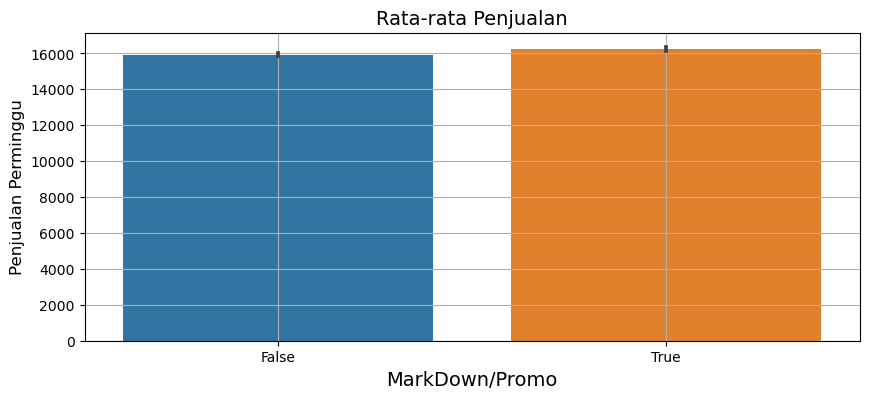

In [127]:
#visualisasi data penjualan, untuk mengetahui toko dengan tingkat penjualan tertinggi
plt.figure(figsize=(10,4))
sns.barplot(x='MarkDown5',y='Weekly_Sales',data=data1)
plt.ylabel('Penjualan Perminggu',fontsize=12)
plt.xlabel('MarkDown/Promo',fontsize=14)
plt.title('Rata-rata Penjualan',fontsize=14)
plt.savefig('./grafik/promo1-penjualan.png')
plt.grid()


In [128]:
data1.groupby('MarkDown5')['Weekly_Sales'].mean().round(2)

MarkDown5
False    15922.14
True     16220.71
Name: Weekly_Sales, dtype: float64

### Dari visualisasi data di atas terlihat bahwa, terjadi peningkatan penjualan ketika terdapat promo.  
### Dimana rata-rata penjualan ketika tidak terdapat promo sebesar 15922.14, sedangkan saat terdapat promo rata-rata penjualan sebesar 16220.71

In [129]:
#menampilkan jumlah kemunculan (frekuensi) data string didalam sebuah kolom
data1.groupby('IsHoliday')['MarkDown5'].value_counts()

IsHoliday  MarkDown5
False      False        251675
           True         137689
True       False         17608
           True          11682
Name: MarkDown5, dtype: int64

### Dari total data sebanyak 418,654 baris data, setelah dikelompokkan berdasarkan hari libur dan promo, terdapat:

1. Sebanyak 251675 data masuk ke dalam kategori BUKAN HARI LIBUR dan juga TIDAK ADA PROMO
2. Sebanyak 137689 data masuk ke dalam kategori BUKAN HARI LIBUR tetapi ADA PROMO
3. Sebanyak 17608 data masuk ke dalam kategori HARI LIBUR tetapi TIDAK ADA PROMO
4. Sebanyak 11682 data masuk ke dalam kategori HARI LIBUR dan juga ADA PROMO

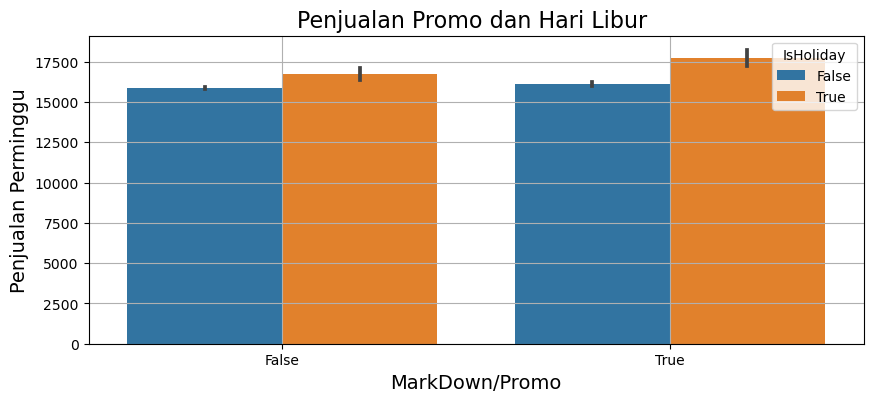

In [130]:
plt.figure(figsize=(10,4))
sns.barplot(x='MarkDown5',y='Weekly_Sales',hue='IsHoliday',data=df)
plt.ylabel('Penjualan Perminggu',fontsize=14)
plt.xlabel('MarkDown/Promo',fontsize=14)
plt.title('Penjualan Promo dan Hari Libur ',fontsize=16)
plt.savefig('./grafik/penjualan-promo-libur.png')
plt.grid()

In [131]:
group_data = data1.groupby(['IsHoliday', 'MarkDown5'])['Weekly_Sales'].mean().round(2).reset_index()
group_data

,IsHoliday,MarkDown5,Weekly_Sales
0,False,False,15866.62
1,False,True,16094.86
2,True,False,16715.63
3,True,True,17704.06


### Distribusi Data IsHoliday dan MarkDown5
### Dari visualisasi di atas terlihat bahwa penjualan tertinggi berada pada kategori hari libur dan juga terdapat promo, dengan rincian sebagai berikut:

1. Rata-rata penjualan pada kategori yang BUKAN HARI LIBUR dan juga TIDAK ADA PROMO sebesar 15866.62.
2. Rata-rata penjualan pada kategori yang BUKAN HARI LIBUR tetapi ADA PROMO sebesar 16094.86.
3. Rata-rata penjualan pada kategori yang merupakan HARI LIBUR tetapi TIDAK ADA PROMO sebesar 16715.63.
4. Rata-rata penjualan pada kategori yang merupakan HARI LIBUR dan juga ADA PROMO sebesar 17704.06.

# CPI (Indeks Harga Konsumen)

In [132]:
df['CPI'].describe().round(2)

count    418654.00
mean        171.20
std          39.16
min         126.06
25%         132.02
50%         182.35
75%         212.41
max         227.23
Name: CPI, dtype: float64

In [133]:
df.groupby('IsHoliday')[['CPI','Weekly_Sales']].mean().round(2)

,CPI,Weekly_Sales
IsHoliday,,
False,171.24,15947.33
True,170.75,17109.85


### Dari hasil pengelompokan data berdasarkan hari libur, terlihat bahwa:
### Pada hari yang bukan hari libur, terdapat nilai rata-rata CPI sebesar 171.24 dengan rata-rata nilai penjualan mingguan sebesar 15947.33.
### Sedangkan pada hari yang merupakan hari libur, terdapat nilai rata-rata CPI sebesar 170.75 dengan rata-rata nilai penjualan mingguan sebesar 17109.85.

In [134]:
#casting data/mengubah nilai feature MarkDown1 mmenjadi boolean
data1=df
data1['CPI']= data1['CPI'].apply(lambda x: True if x > 0 else False)
data1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,False,False,False,False,False,True,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,False,False,False,False,False,True,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,False,False,False,False,False,True,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,False,False,False,False,False,True,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,False,False,False,False,False,True,8.106,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,True,True,True,True,True,True,8.667,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,True,True,True,True,True,True,8.667,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,True,True,True,True,True,True,8.667,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,True,True,True,True,True,True,8.667,B,118221,43,10,2012


In [135]:
data1['CPI'].value_counts()

True    418654
Name: CPI, dtype: int64

### Dari total data yang dimiliki, terdapat sebanyak 418654 data yang memiliki nilai CPI

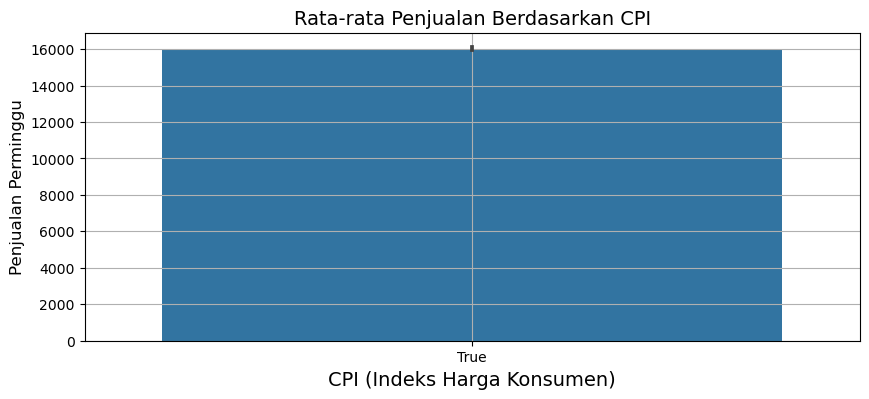

In [136]:
# visualisasi data penjualan, untuk mengetahui hubungan antara CPI dan tingkat penjualan
plt.figure(figsize=(10,4))
sns.barplot(x='CPI', y='Weekly_Sales', data=data1)
plt.ylabel('Penjualan Perminggu', fontsize=12)
plt.xlabel('CPI (Indeks Harga Konsumen)', fontsize=14)
plt.title('Rata-rata Penjualan Berdasarkan CPI', fontsize=14)
plt.savefig('./grafik/cpi-penjualan.png')
plt.grid()



In [137]:
data1.groupby('CPI')['Weekly_Sales'].mean().round(2)

CPI
True    16028.66
Name: Weekly_Sales, dtype: float64

### terlihat bahwa rata-rata penjualan mingguan untuk data yang memiliki nilai CPI True adalah sebesar 16028.66

In [138]:
#menampilkan jumlah kemunculan (frekuensi) data string didalam sebuah kolom
data1.groupby('IsHoliday')['CPI'].value_counts()

IsHoliday  CPI 
False      True    389364
True       True     29290
Name: CPI, dtype: int64

### Dari total data sebanyak 418654 baris data, setelah dikelompokkan berdasarkan hari libur dan nilai CPI, terdapat:

### Sebanyak 389364 data yang termasuk dalam kategori BUKAN HARI LIBUR dan memiliki nilai CPI True, yang mengindikasikan adanya penyesuaian harga konsumen di luar periode hari libur.
### Sebanyak 29290 data yang termasuk dalam kategori HARI LIBUR dan memiliki nilai CPI True, yang mengindikasikan bahwa pada hari libur tersebut harga telah disesuaikan dengan CPI.

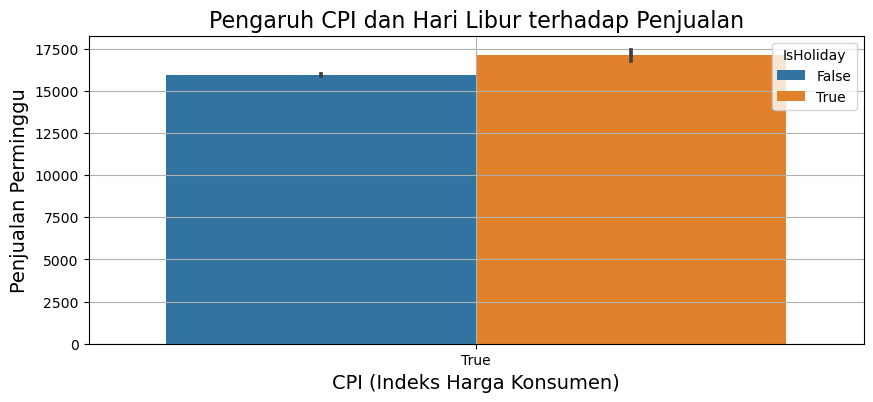

In [139]:
plt.figure(figsize=(10,4))
sns.barplot(x='CPI', y='Weekly_Sales', hue='IsHoliday', data=df)
plt.ylabel('Penjualan Perminggu', fontsize=14)
plt.xlabel('CPI (Indeks Harga Konsumen)', fontsize=14)
plt.title('Pengaruh CPI dan Hari Libur terhadap Penjualan', fontsize=16)
plt.savefig('./grafik/penjualan-cpi-libur.png')
plt.grid()



In [140]:
group_data = data1.groupby(['IsHoliday', 'CPI'])['Weekly_Sales'].mean().round(2).reset_index()
group_data


,IsHoliday,CPI,Weekly_Sales
0,False,True,15947.33
1,True,True,17109.85


### Rata-rata penjualan pada kategori yang BUKAN HARI LIBUR dengan CPI True sebesar 15947.33
### Rata-rata penjualan pada kategori yang HARI LIBUR dengan CPI True sebesar 17109.85
### terlihat bahwa rata-rata penjualan lebih tinggi pada hari libur dibandingkan dengan hari biasa ketika CPI (Indeks Harga Konsumen) bernilai True

# Unemployment (Tingkat Pengangguran)

In [141]:
df['Unemployment'].describe().round(2)

count    418654.00
mean          7.96
std           1.86
min           3.88
25%           6.89
50%           7.87
75%           8.57
max          14.31
Name: Unemployment, dtype: float64

In [142]:
df.groupby('IsHoliday')[['Unemployment','Weekly_Sales']].mean().round(2)

,Unemployment,Weekly_Sales
IsHoliday,,
False,7.96,15947.33
True,8.04,17109.85


### Pada hari biasa (bukan hari libur), rata-rata tingkat pengangguran sebesar 7.96 dengan rata-rata penjualan mingguan sebesar 15947.33.
### Pada hari libur, rata-rata tingkat pengangguran sedikit lebih tinggi, yaitu 8.04, dengan rata-rata penjualan mingguan sebesar 17109.85.

In [143]:
#casting data/mengubah nilai feature MarkDown1 mmenjadi boolean
data1=df
data1['Unemployment']= data1['Unemployment'].apply(lambda x: True if x > 0 else False)
data1


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,False,False,False,False,False,True,True,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,False,False,False,False,False,True,True,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,False,False,False,False,False,True,True,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,False,False,False,False,False,True,True,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,False,False,False,False,False,True,True,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,True,True,True,True,True,True,True,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,True,True,True,True,True,True,True,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,True,True,True,True,True,True,True,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,True,True,True,True,True,True,True,B,118221,43,10,2012


In [144]:
data1['Unemployment'].value_counts()

True    418654
Name: Unemployment, dtype: int64

### Dari total data sebanyak 418654 baris, semua data memiliki nilai yang menunjukkan adanya pengangguran, yang berarti data ini berkaitan dengan kondisi pengangguran atau faktor yang mempengaruhinya dalam konteks analisis ini

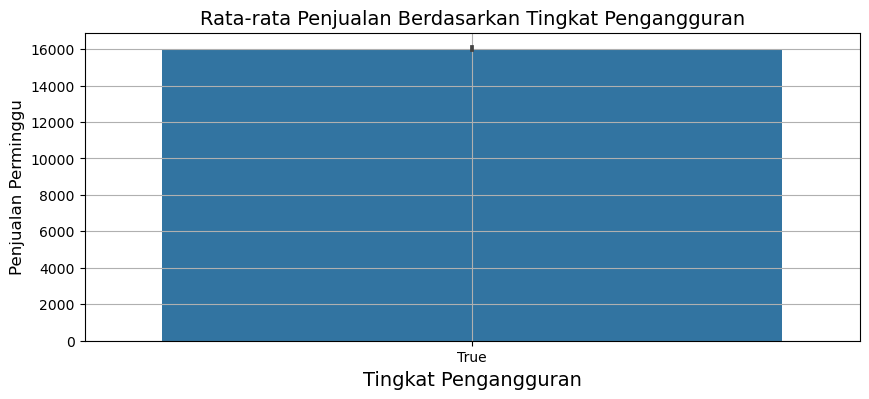

In [145]:
# Visualisasi data penjualan berdasarkan tingkat pengangguran
plt.figure(figsize=(10,4))
sns.barplot(x='Unemployment', y='Weekly_Sales', data=data1)
plt.ylabel('Penjualan Perminggu', fontsize=12)
plt.xlabel('Tingkat Pengangguran', fontsize=14)
plt.title('Rata-rata Penjualan Berdasarkan Tingkat Pengangguran', fontsize=14)
plt.savefig('./grafik/unemployment-penjualan.png')
plt.grid()


In [146]:
data1.groupby('Unemployment')['Weekly_Sales'].mean().round(2)

Unemployment
True    16028.66
Name: Weekly_Sales, dtype: float64

### Dari hasil pengelompokan data berdasarkan tingkat pengangguran, terlihat bahwa rata-rata penjualan mingguan untuk periode yang tercatat adanya pengangguran adalah sebesar 16028.66

In [147]:
#menampilkan jumlah kemunculan (frekuensi) data string didalam sebuah kolom
data1.groupby('IsHoliday')['Unemployment'].value_counts()

IsHoliday  Unemployment
False      True            389364
True       True             29290
Name: Unemployment, dtype: int64

### Dari total data sebanyak 418654 baris setelah dikelompokkan berdasarkan kondisi hari libur dan tingkat pengangguran, terdapat:

### 389364 data yang termasuk dalam kategori BUKAN HARI LIBUR dan memiliki TINGKAT PENGANGGURAN.
### 29290 data yang termasuk dalam kategori HARI LIBUR dan juga memiliki TINGKAT PENGANGGURAN.

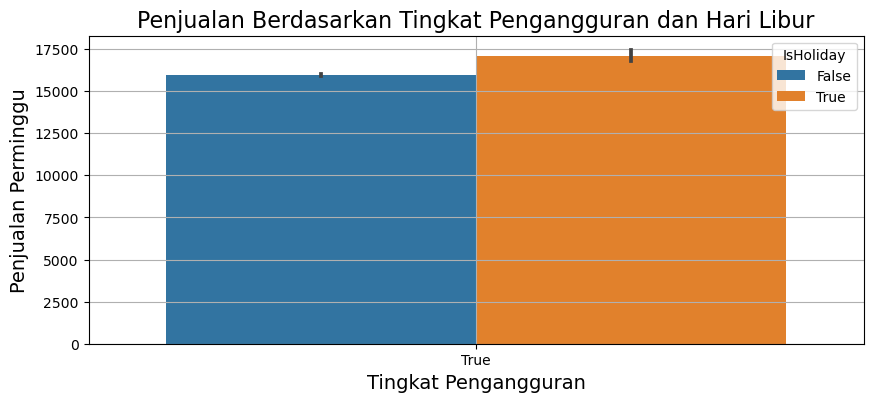

In [148]:
plt.figure(figsize=(10,4))
sns.barplot(x='Unemployment', y='Weekly_Sales', hue='IsHoliday', data=df)
plt.ylabel('Penjualan Perminggu', fontsize=14)
plt.xlabel('Tingkat Pengangguran', fontsize=14)
plt.title('Penjualan Berdasarkan Tingkat Pengangguran dan Hari Libur', fontsize=16)
plt.savefig('./grafik/penjualan-unemployment-libur.png')
plt.grid()

In [149]:
group_data = data1.groupby(['IsHoliday', 'Unemployment'])['Weekly_Sales'].mean().round(2).reset_index()
group_data


,IsHoliday,Unemployment,Weekly_Sales
0,False,True,15947.33
1,True,True,17109.85


### Rata-rata penjualan pada kategori yang BUKAN HARI LIBUR dan TINGKAT PENGANGGURAN TERCATAT sebesar 15947.33
### Rata-rata penjualan pada kategori yang HARI LIBUR dan TINGKAT PENGANGGURAN TERCATAT sebesar 17109.85